In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pidsdf = pd.read_csv('../data/raw/pids.txt', header=None)
pids = pidsdf[0].tolist()

# Load it up

In [3]:
full_data_path = os.path.join('..', 'data', 'interim', 'full_data')
raw_tac_path = os.path.join('..', 'data', 'raw', 'raw_tac')
clean_tac_path = os.path.join('..', 'data', 'raw', 'clean_tac')

dfs = {}
raw_tacs = {}
clean_tacs = {}

for pid in pids:
    dfs[pid] = pd.read_csv(os.path.join(full_data_path, f'{pid}.csv'))
    raw_tacs[pid] = pd.read_excel(os.path.join(raw_tac_path, f'{pid} CAM Results.xlsx'), header=1)
    clean_tacs[pid] = pd.read_csv(os.path.join(clean_tac_path, f'{pid}_clean_TAC.csv'))

# Sanity Checks

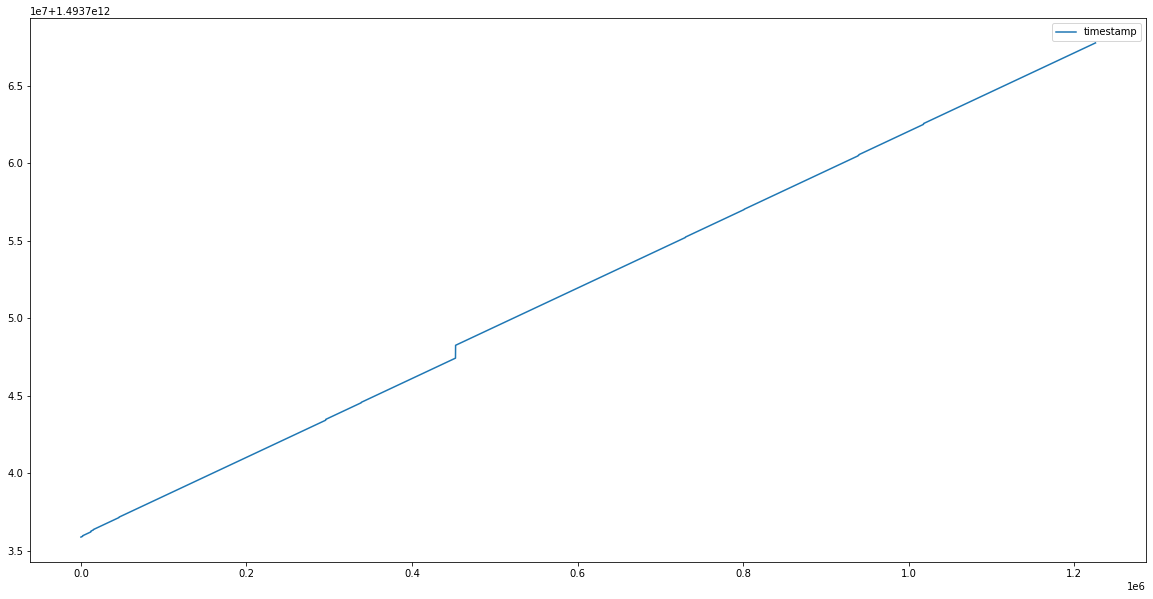

In [4]:
dfs[pids[0]].plot.line(y=['timestamp'], figsize=(20, 10))

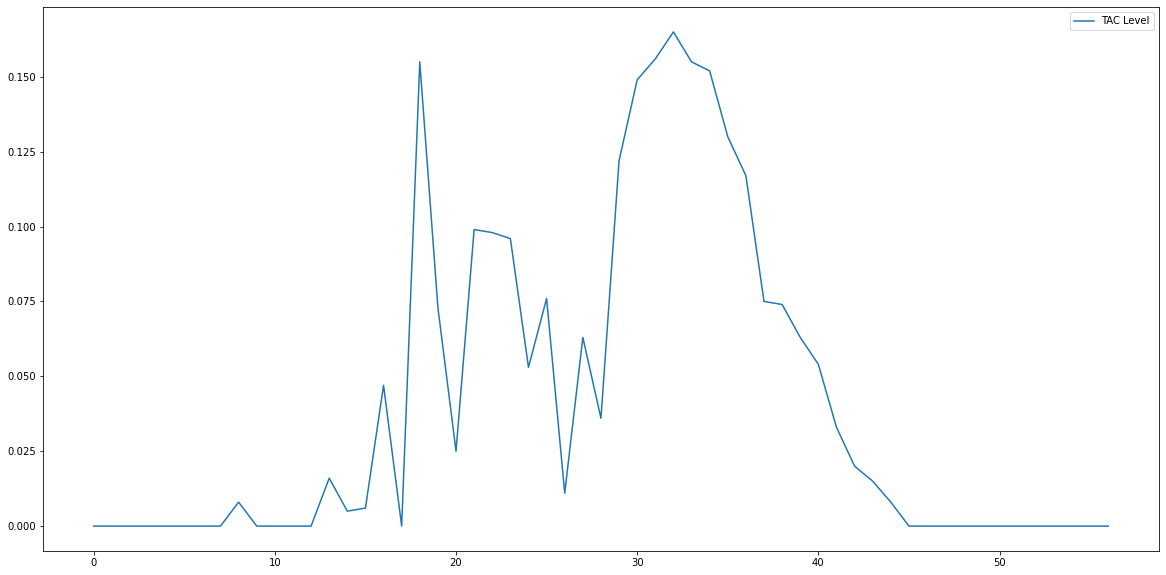

In [5]:
raw_tacs[pids[0]].plot.line(y=['TAC Level'], figsize=(20, 10))

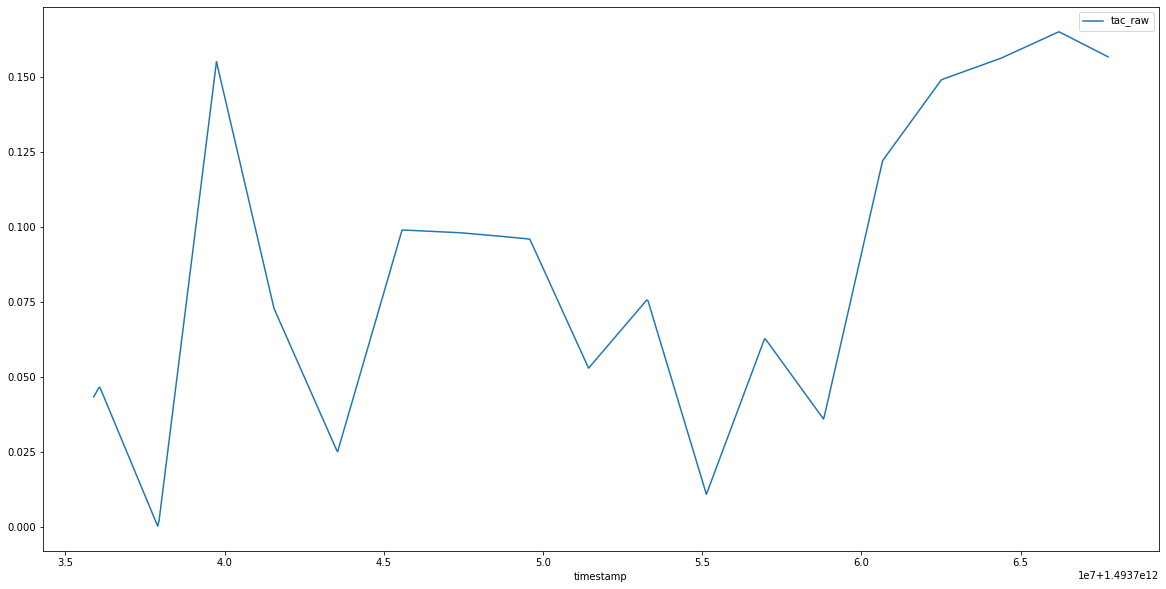

In [6]:
dfs[pids[0]].plot.line(x='timestamp', y=['tac_raw'], figsize=(20, 10))

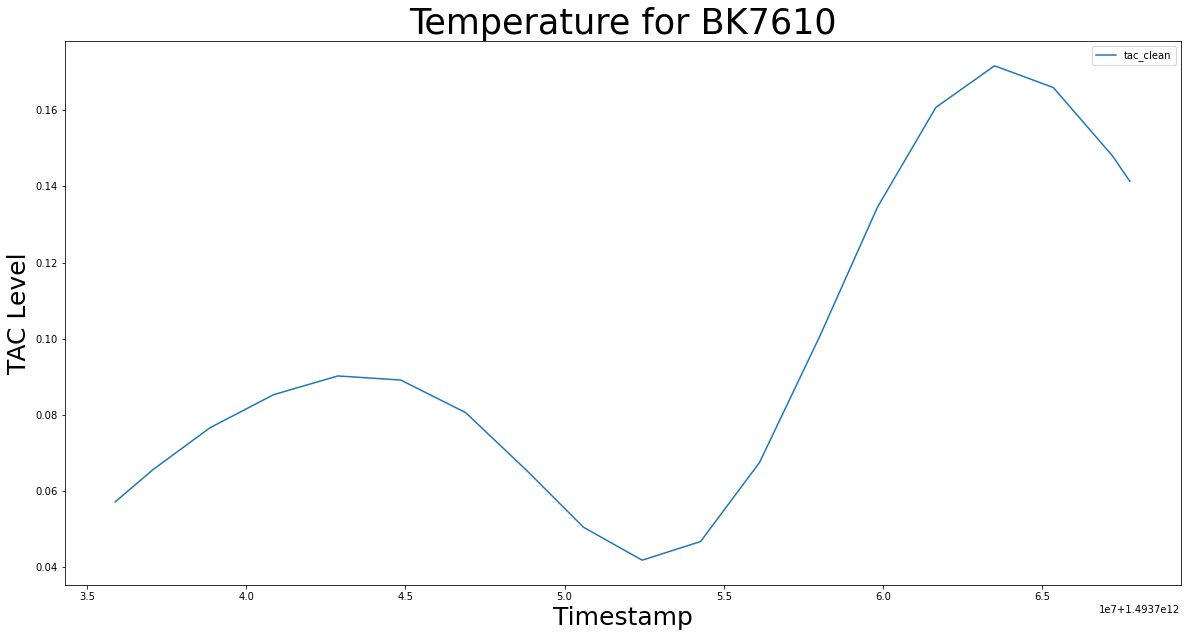

In [7]:
dfs[pids[0]].plot.line(x='timestamp', y=['tac_clean'], figsize=(20, 10))
plt.title(f"Temperature for {pids[0]}", fontsize=35)
plt.xlabel("Timestamp", fontsize=25)
plt.ylabel("TAC Level", fontsize=25)
plt.show()

# Visualising

# One Axis + Absolute Values (TAC is not real, but emphasized)

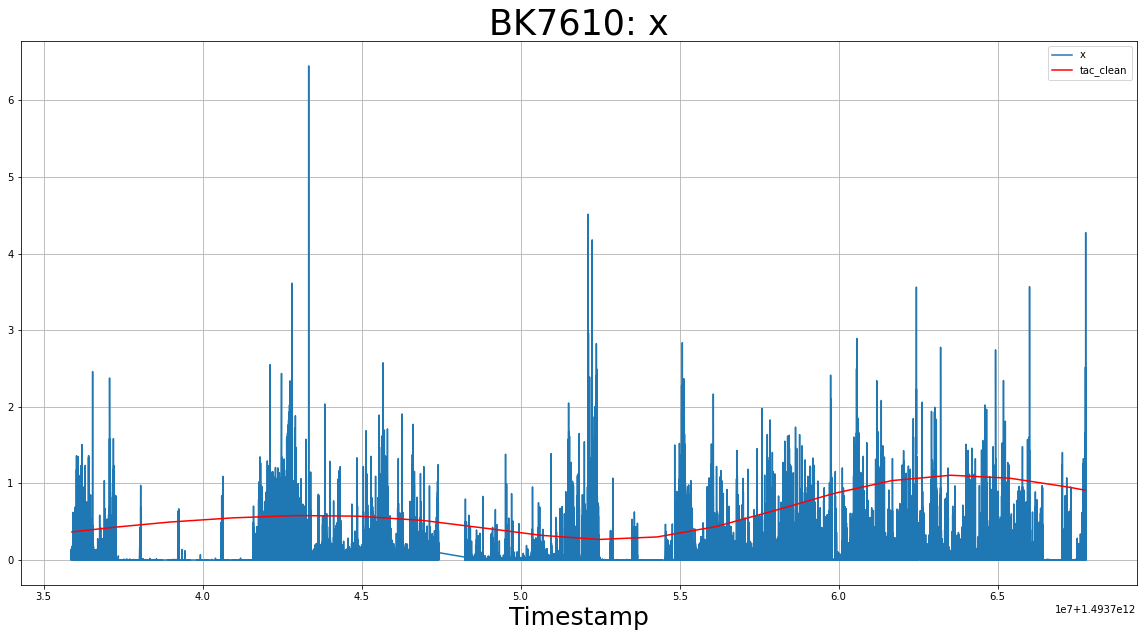

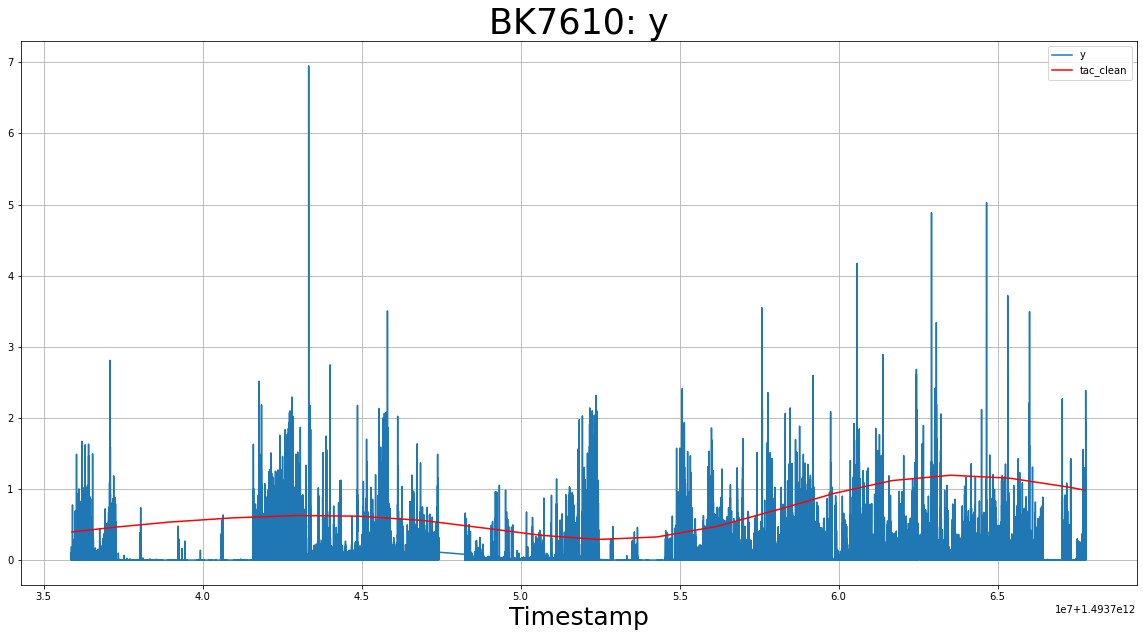

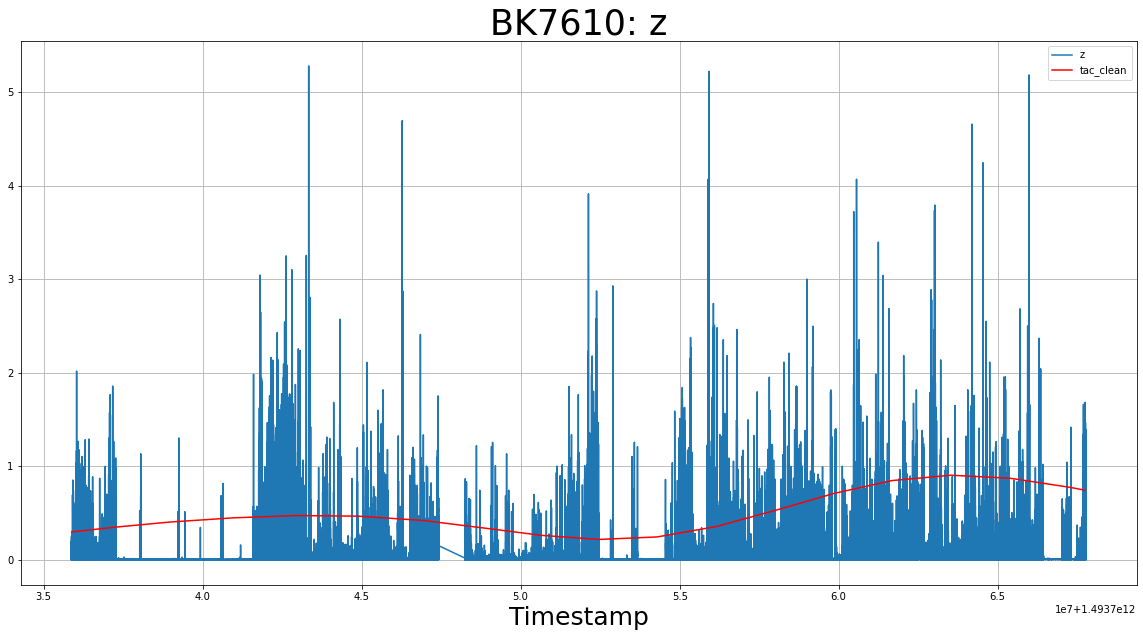

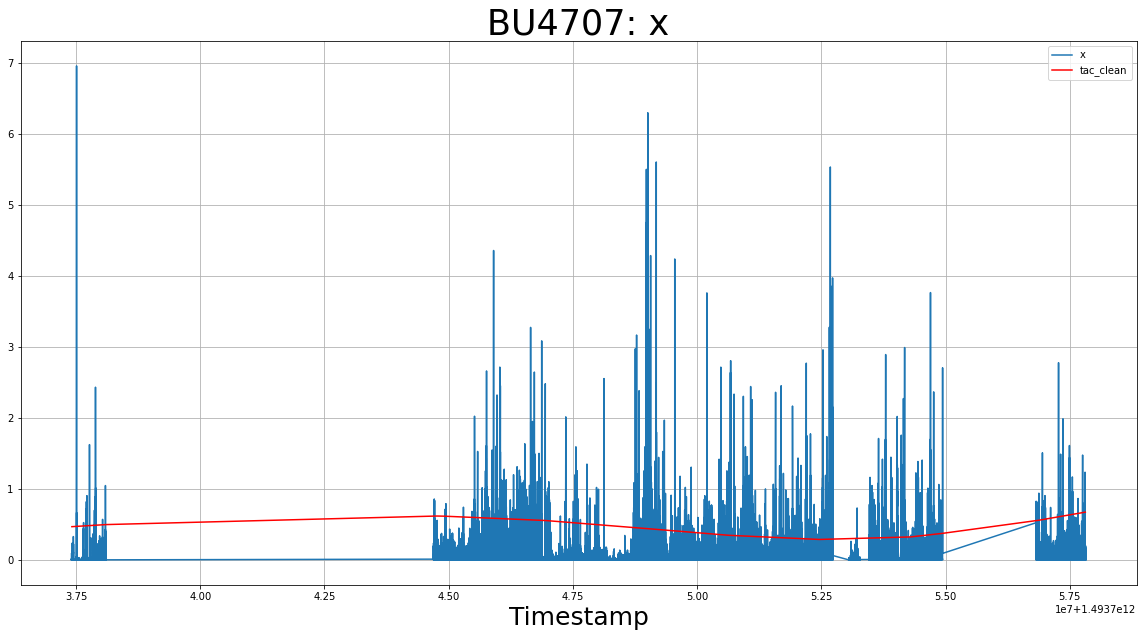

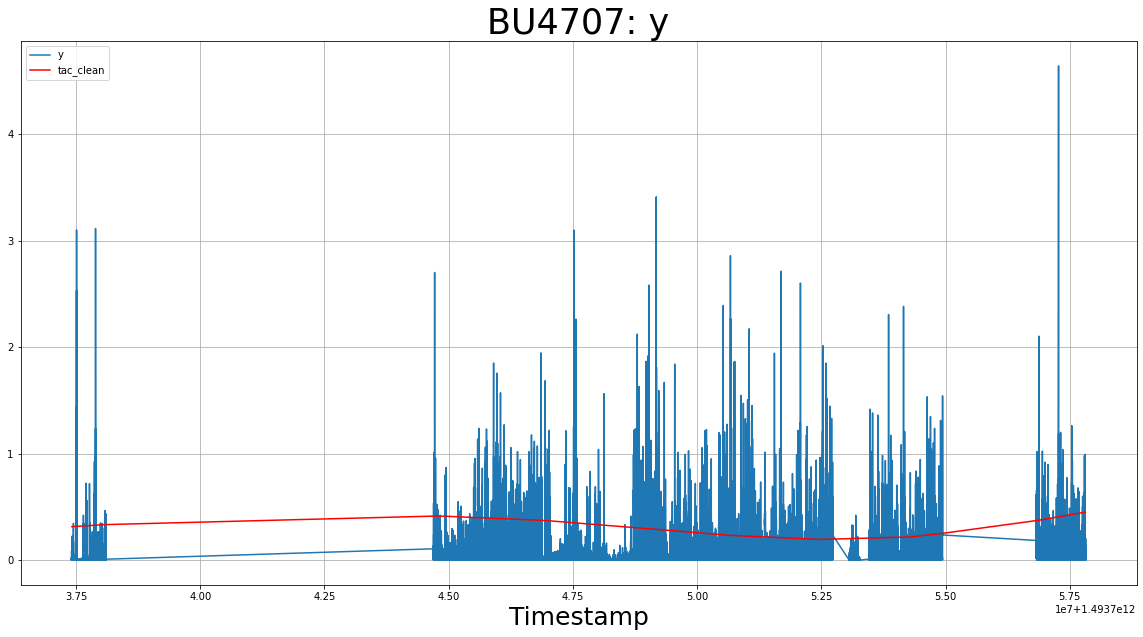

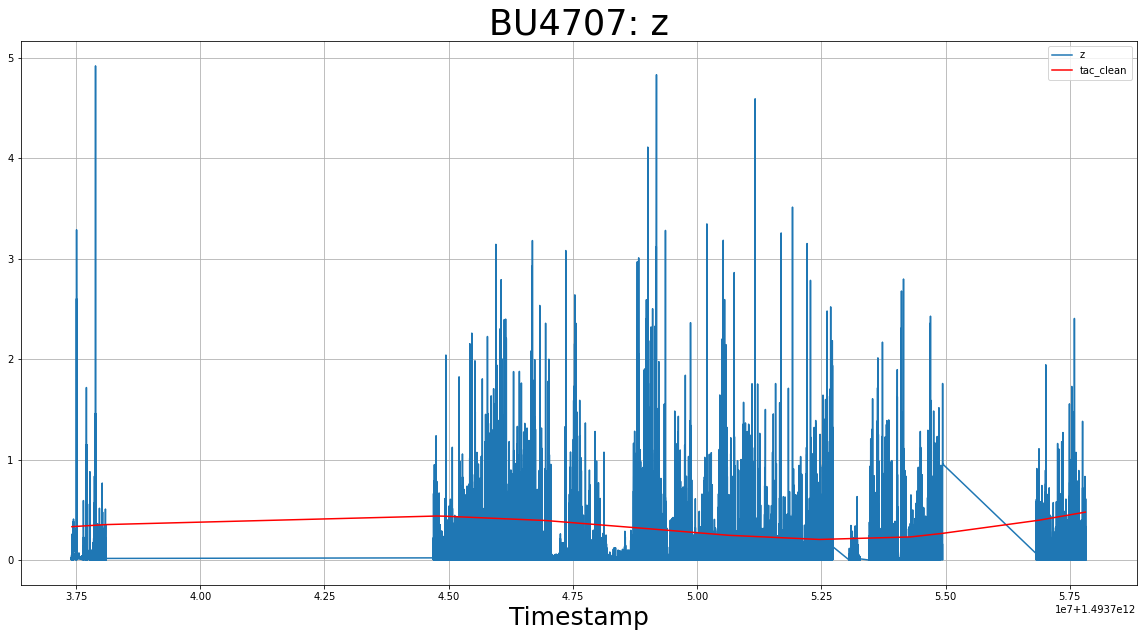

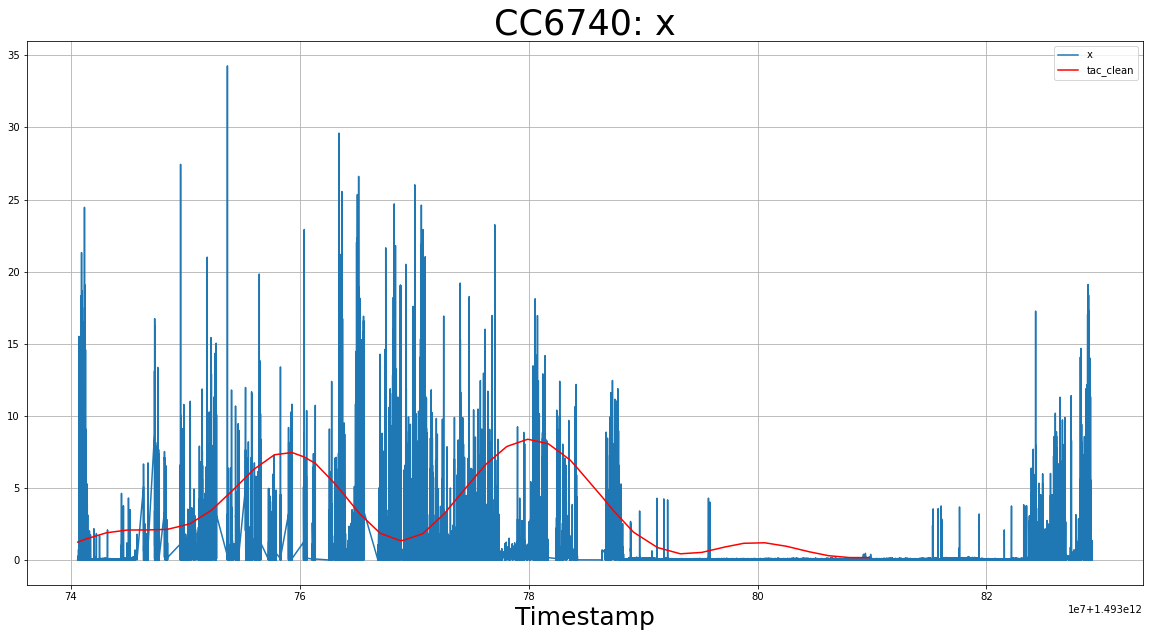

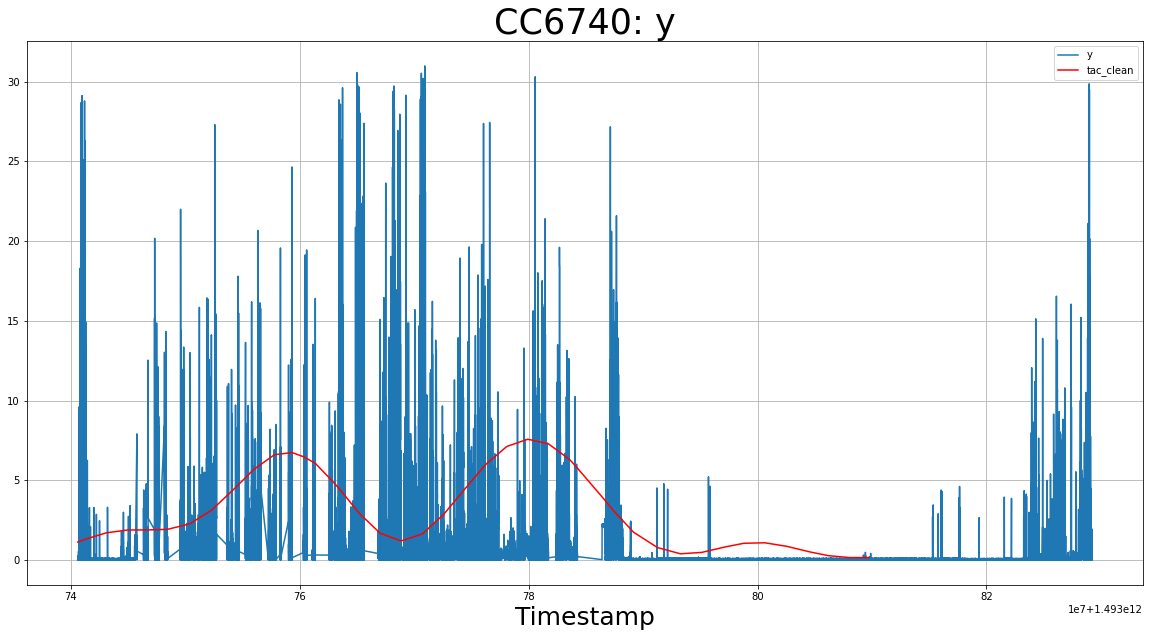

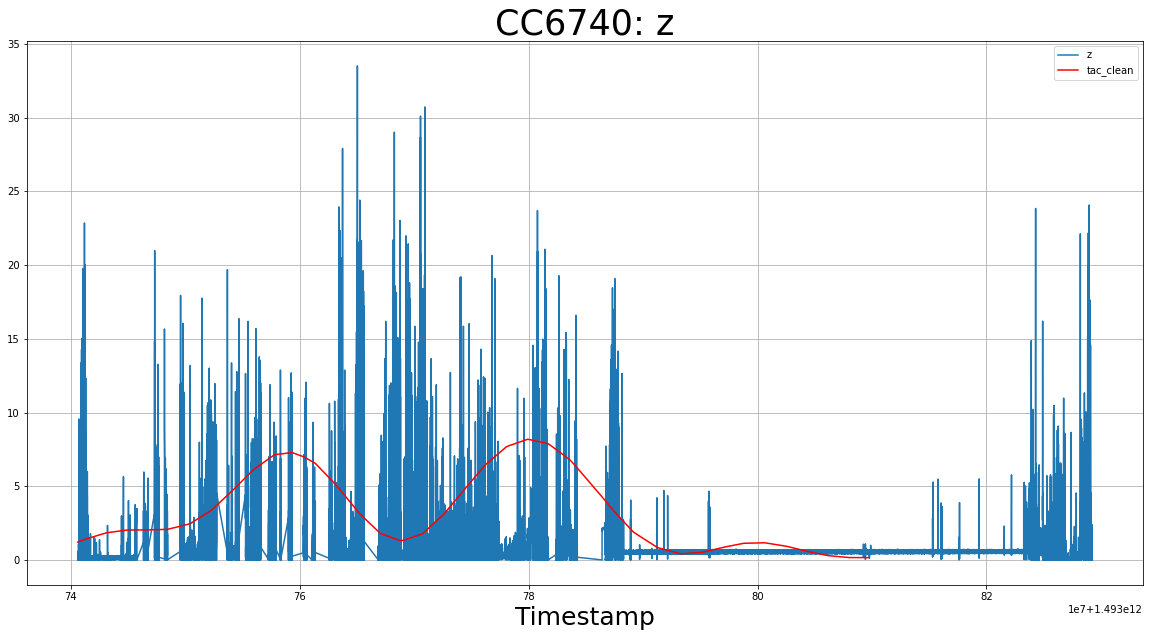

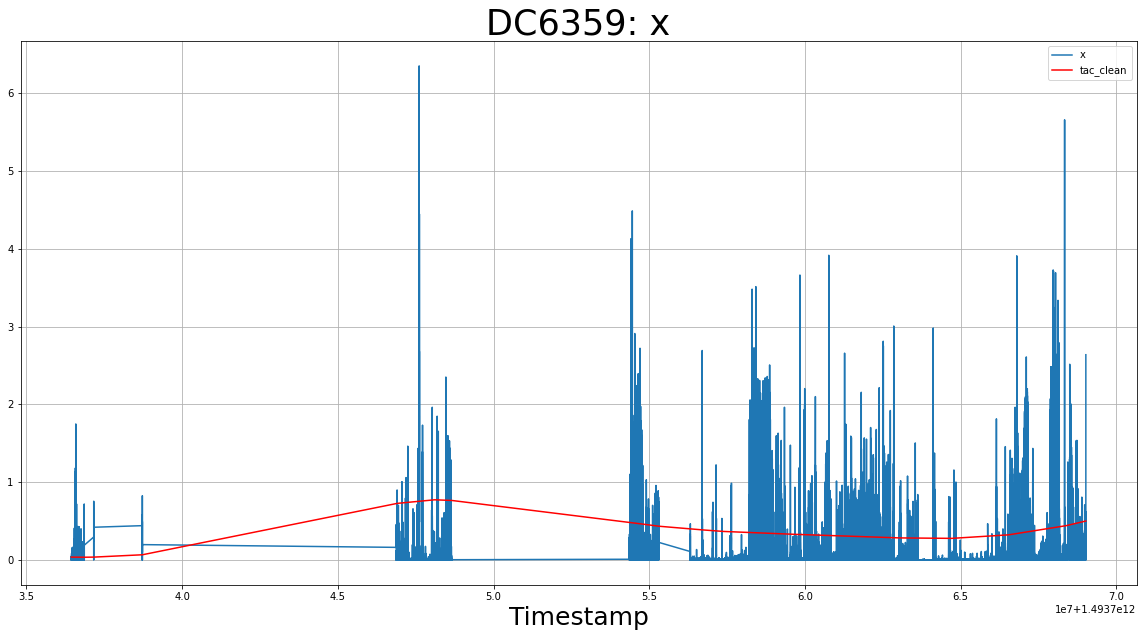

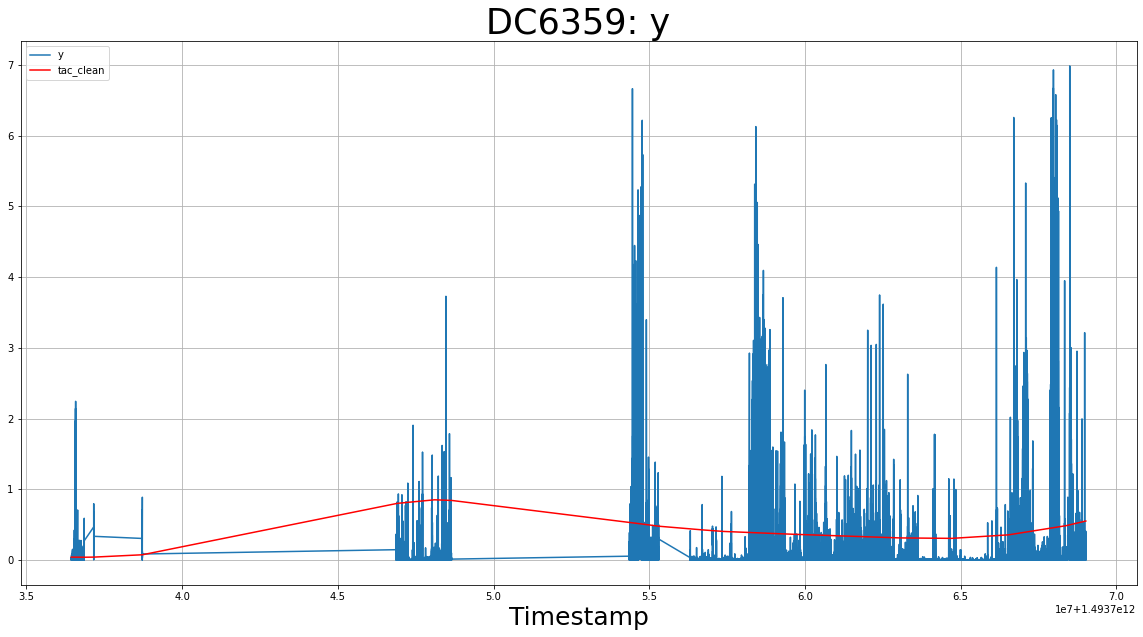

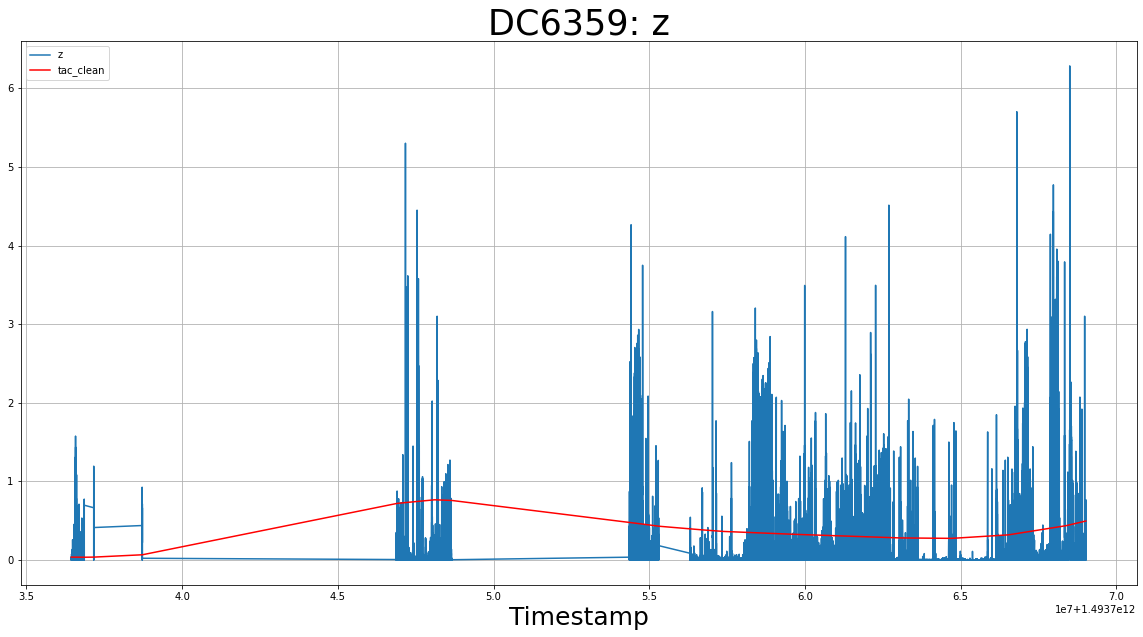

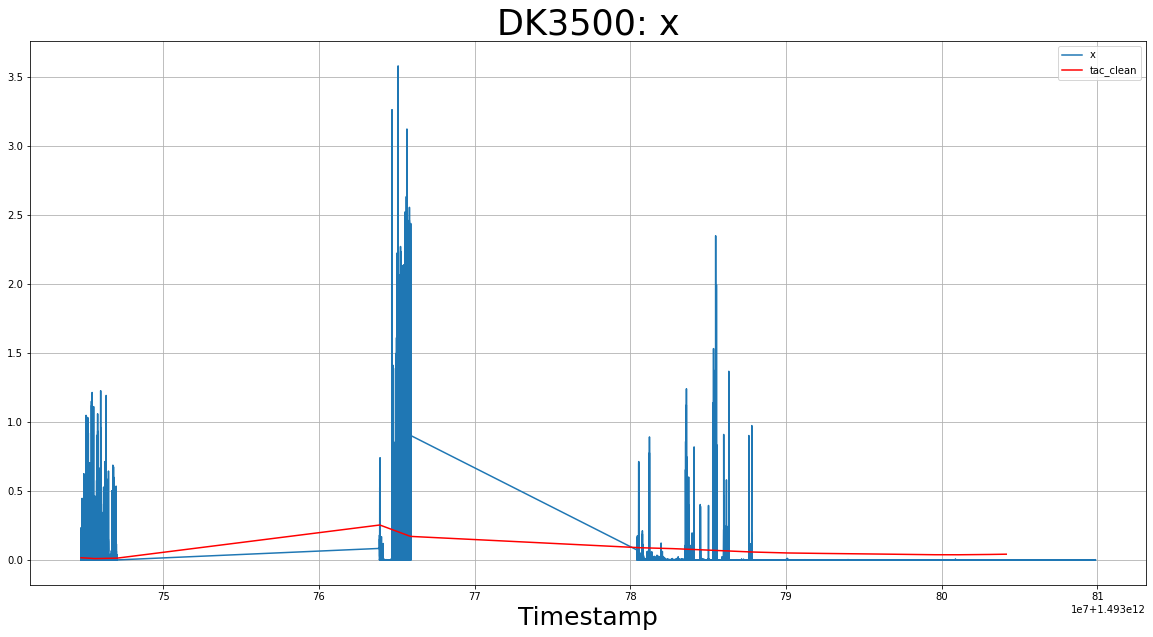

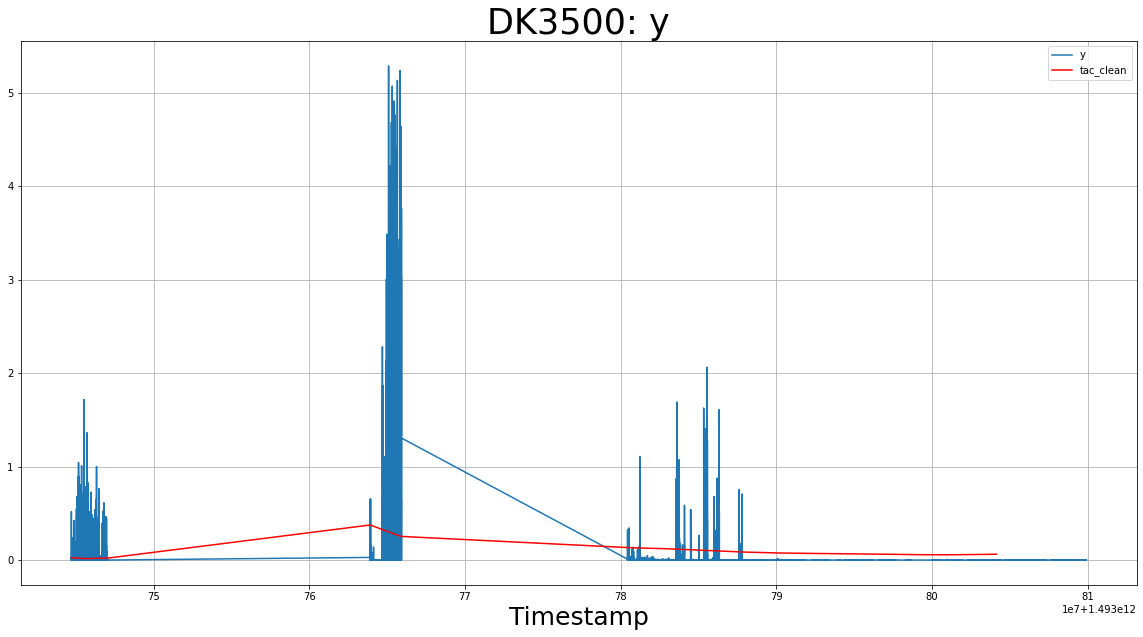

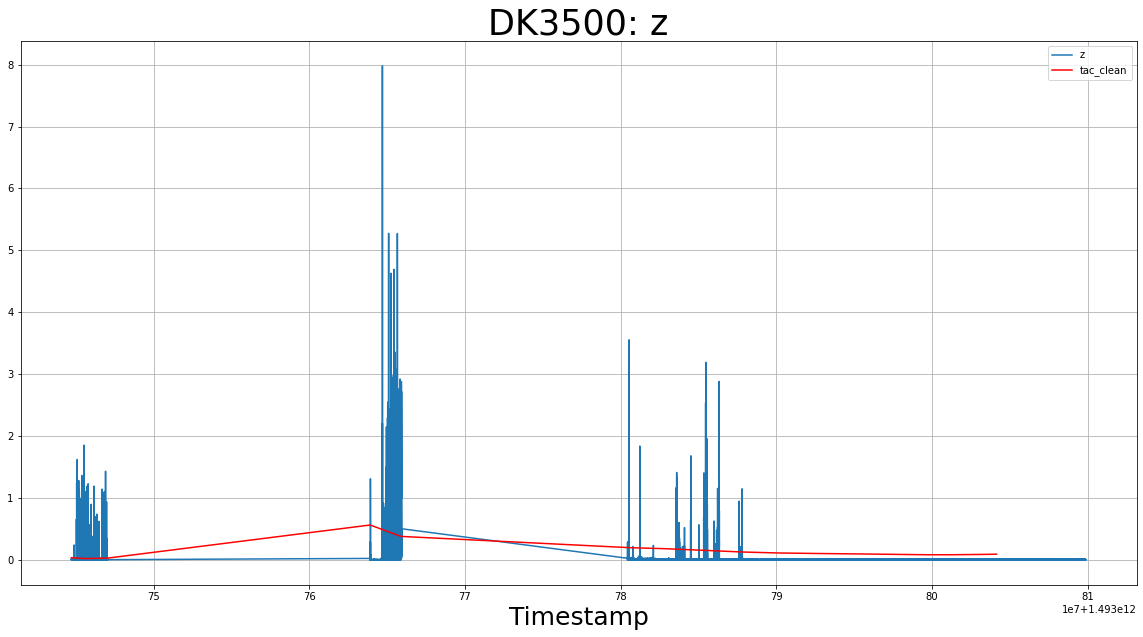

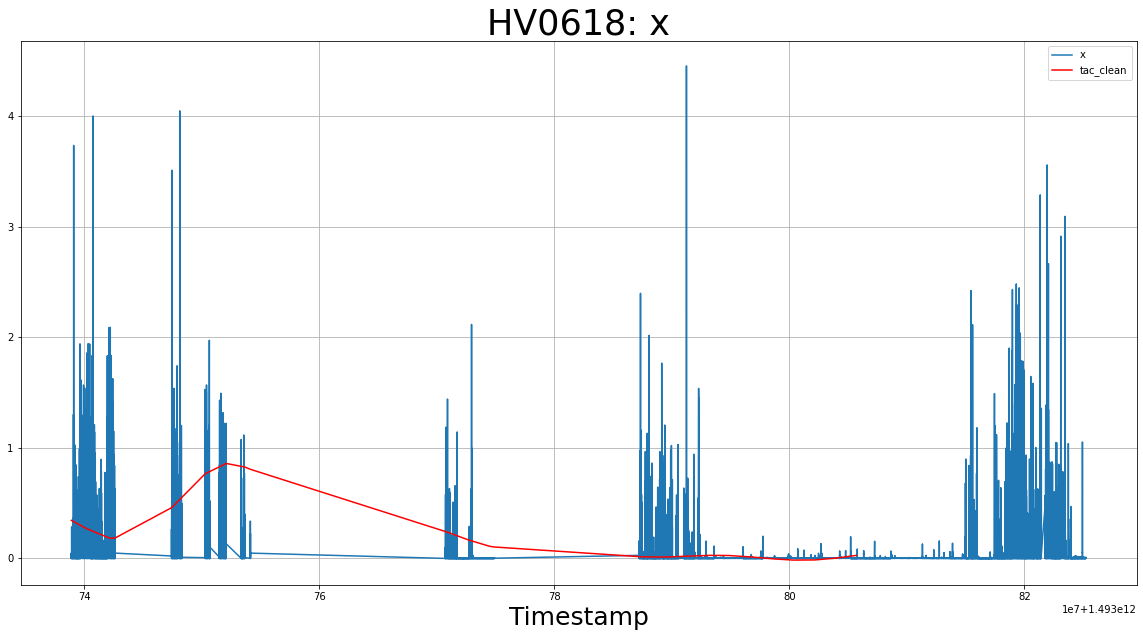

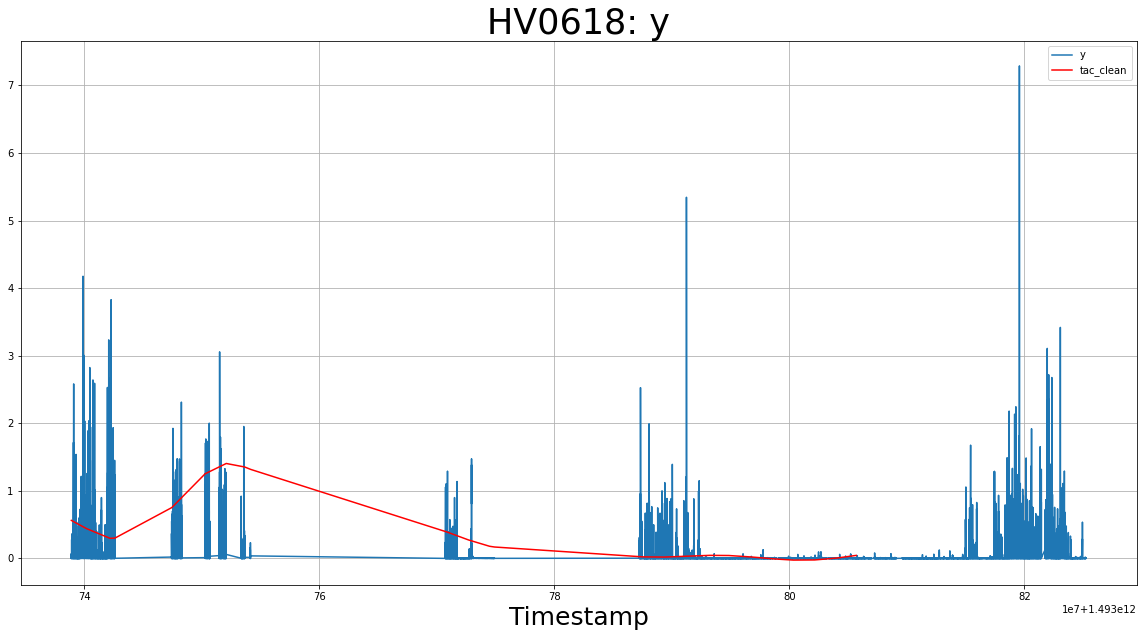

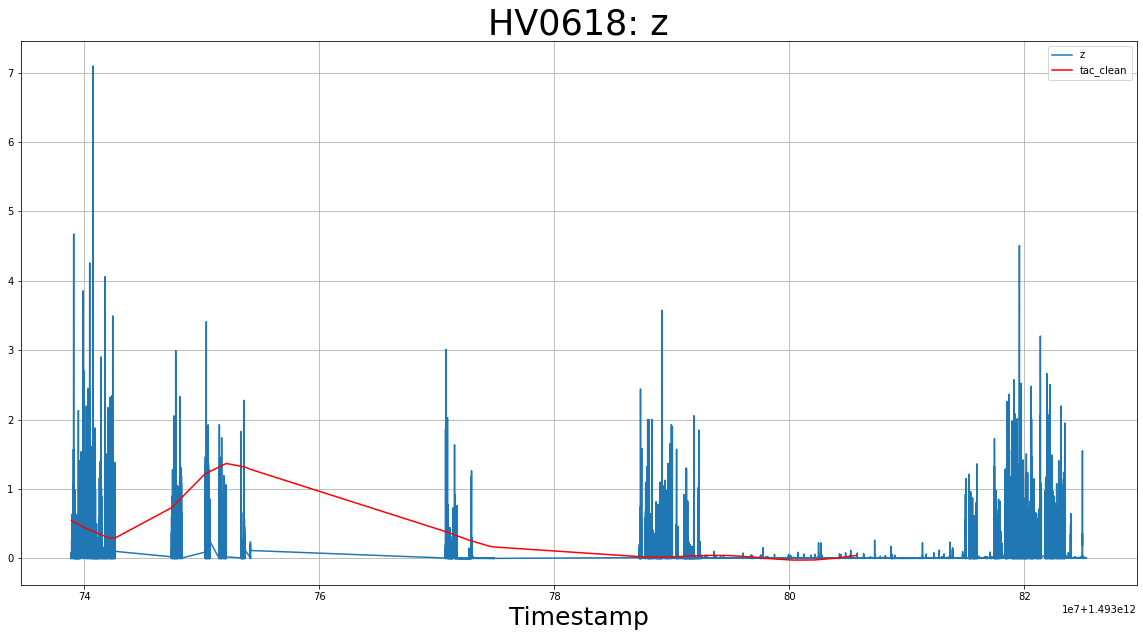

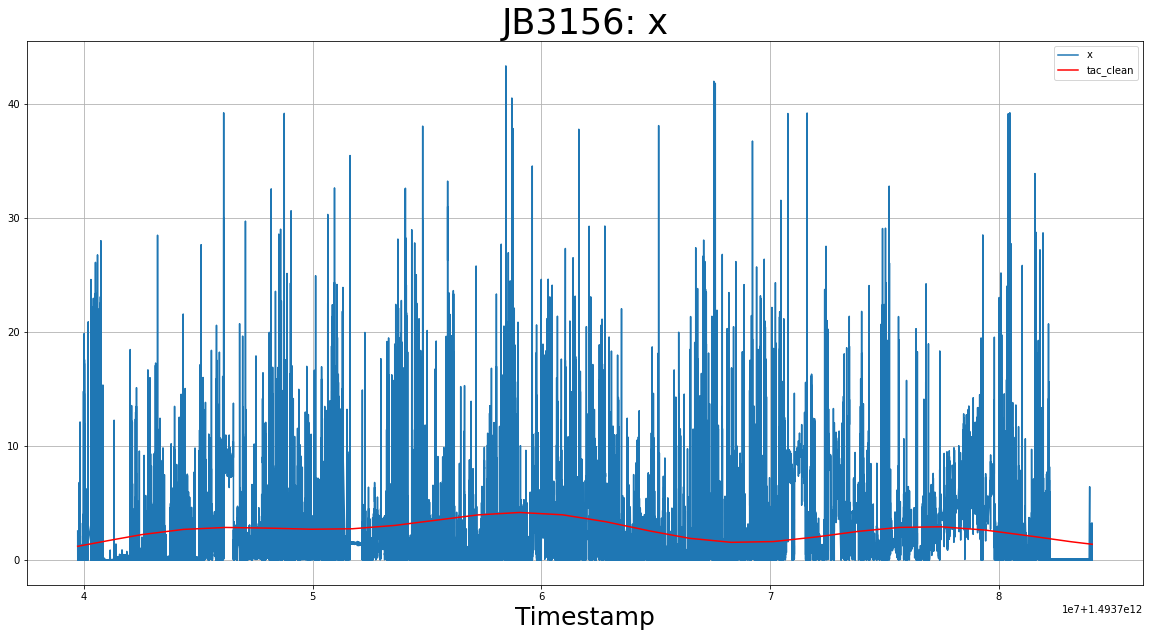

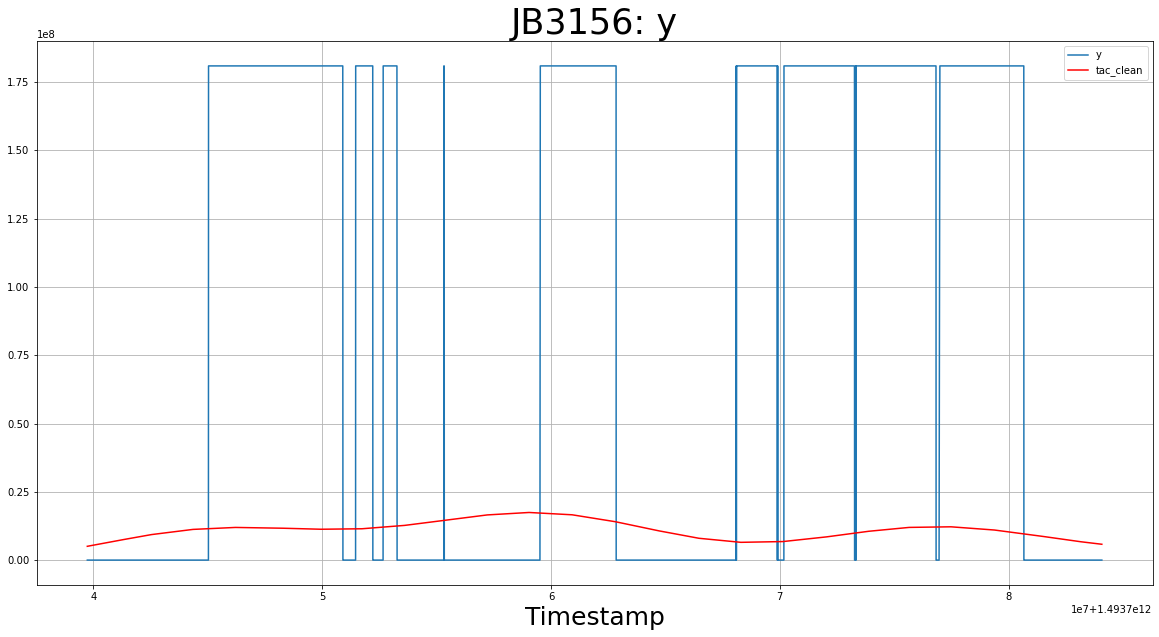

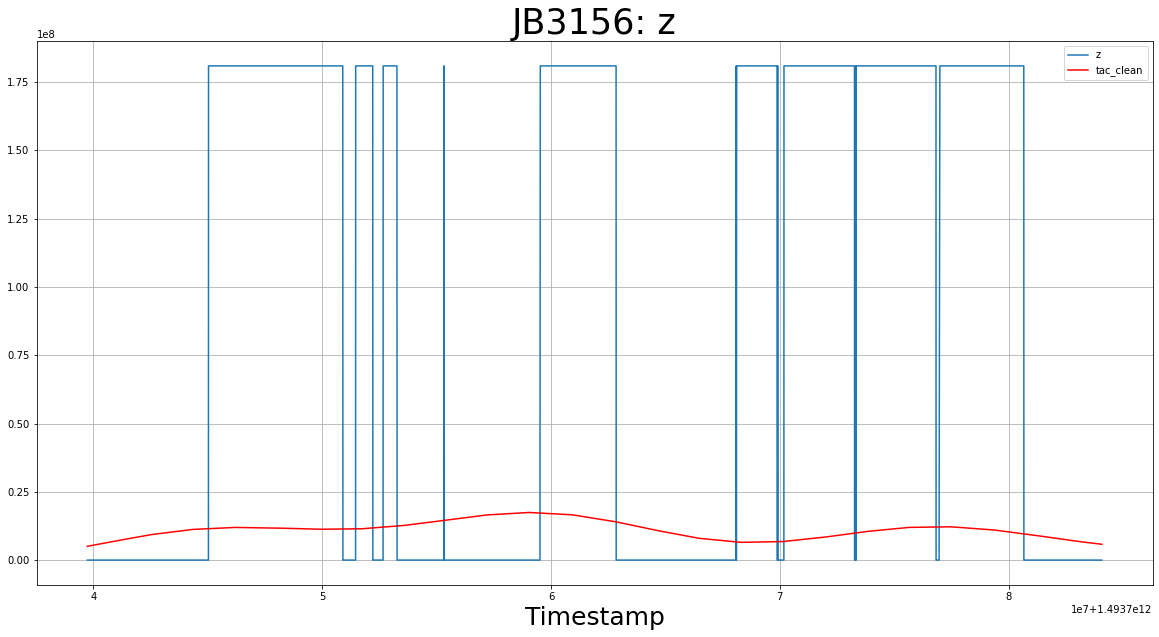

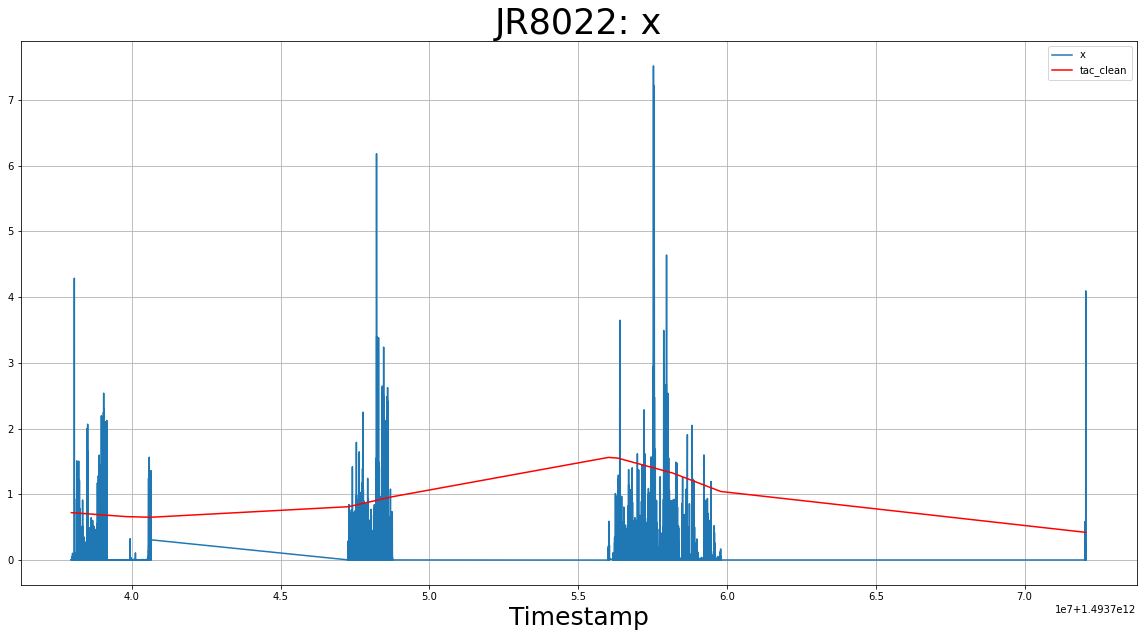

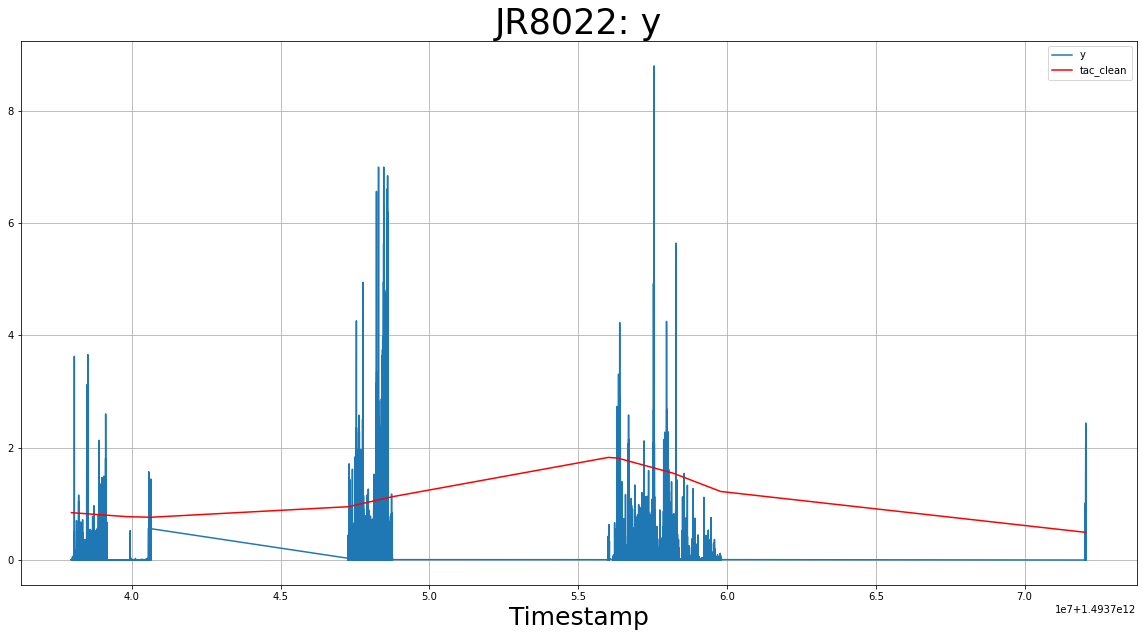

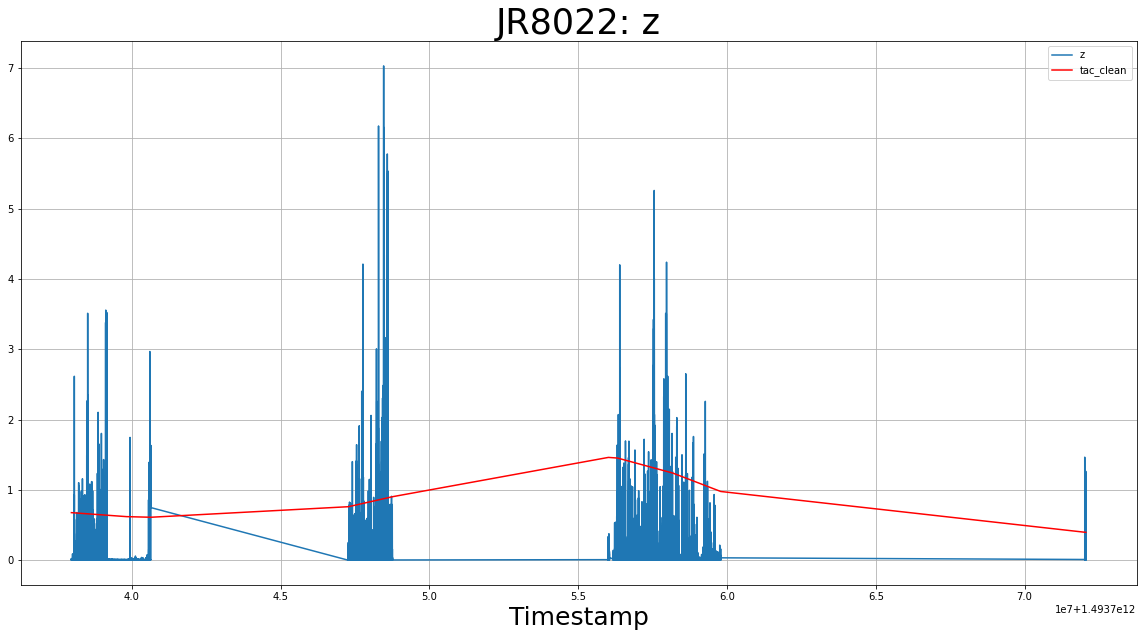

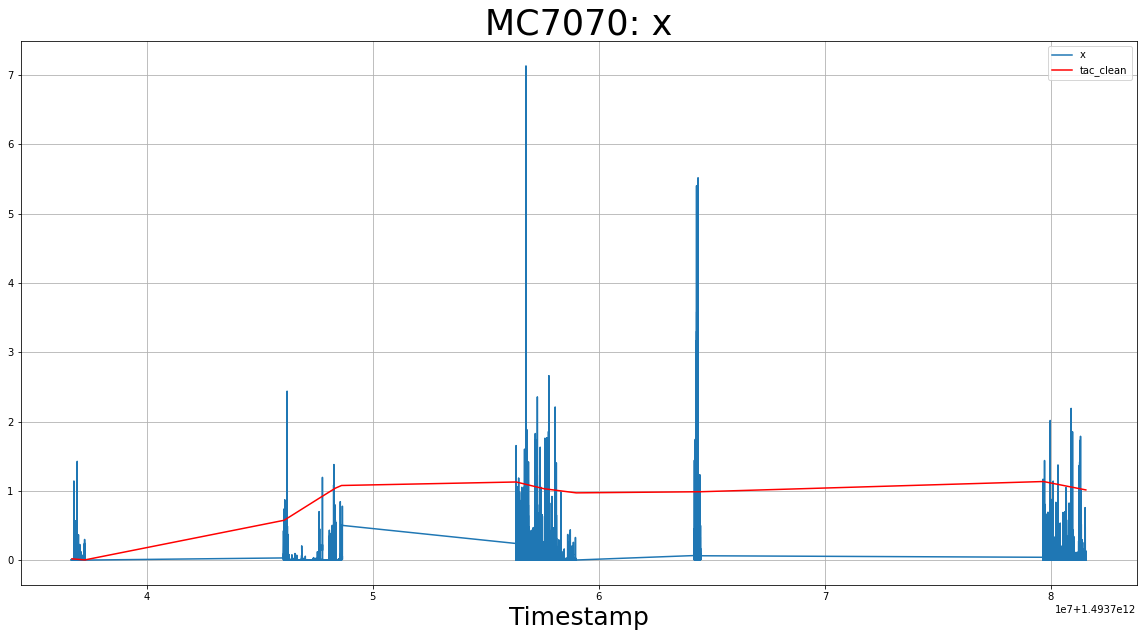

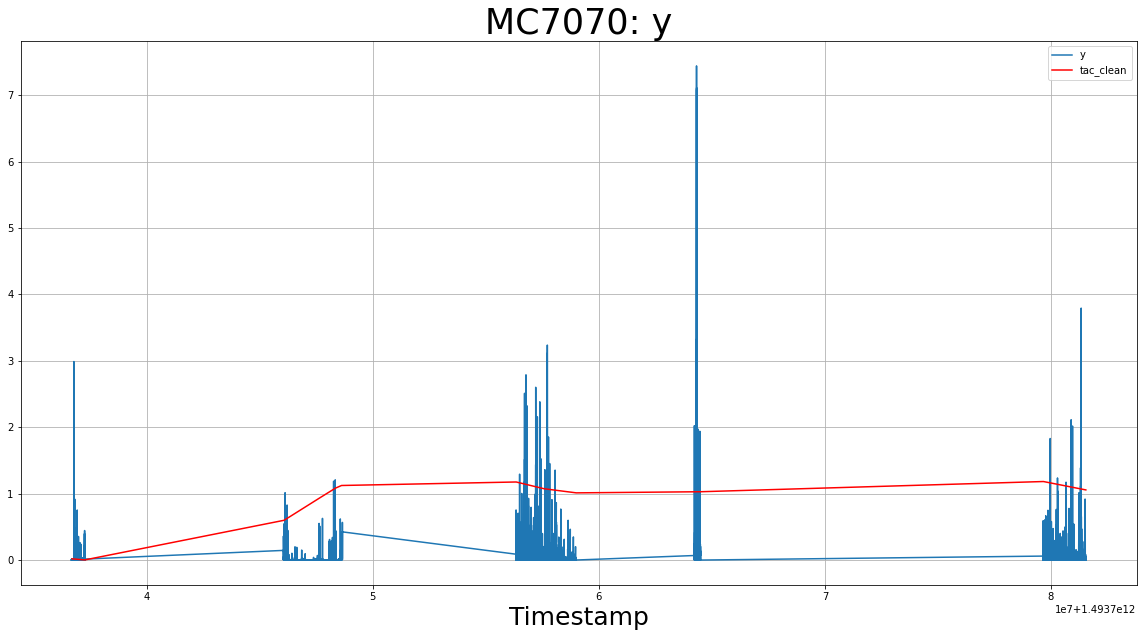

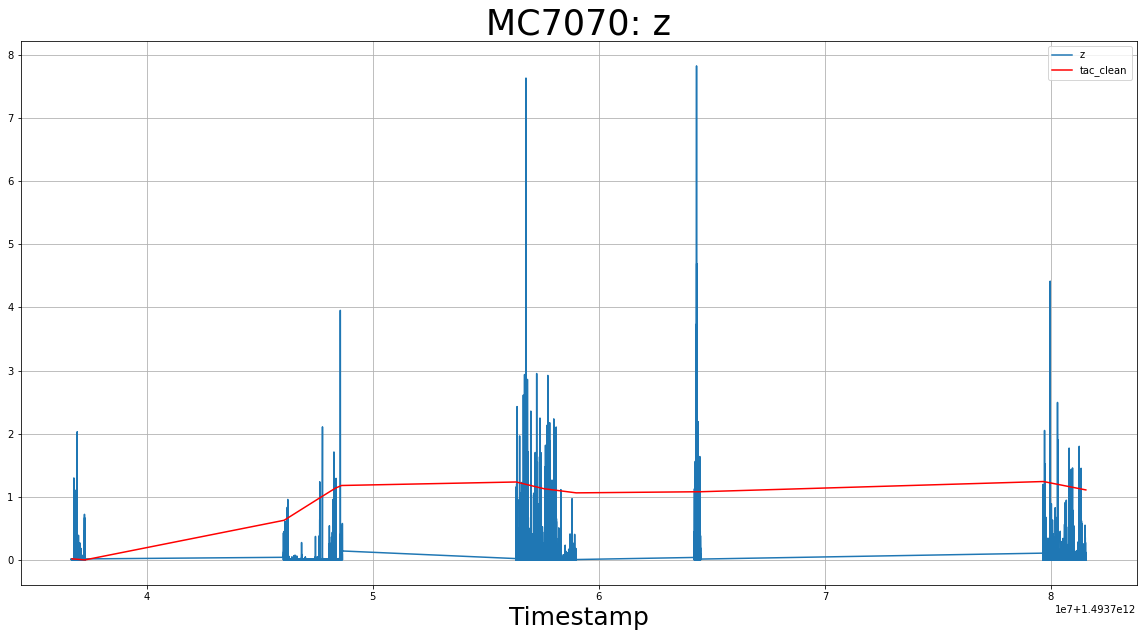

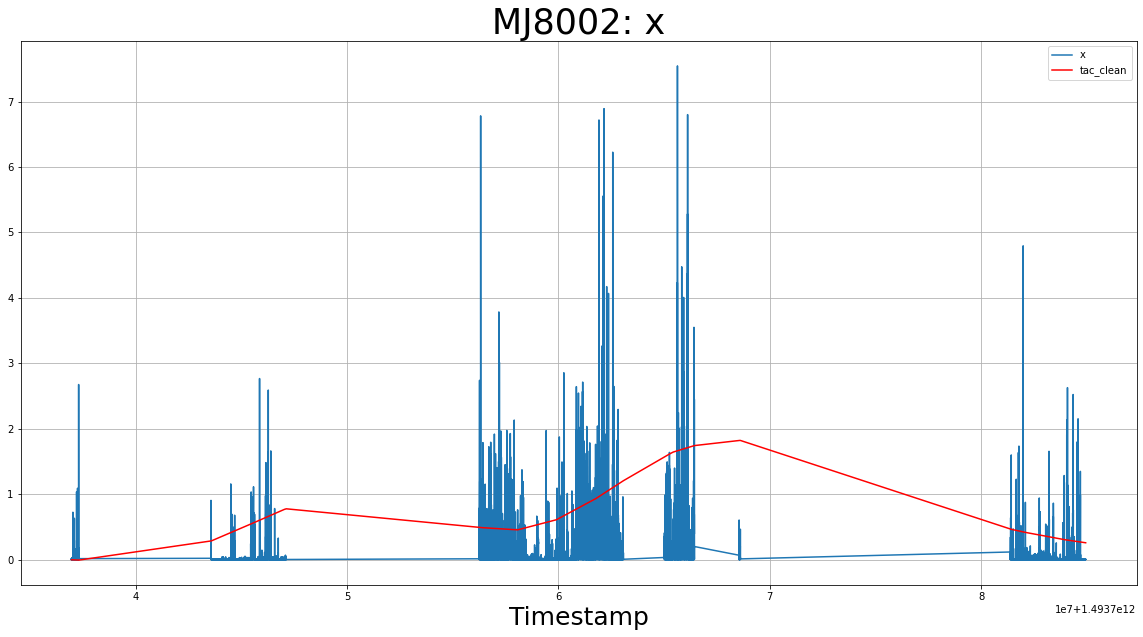

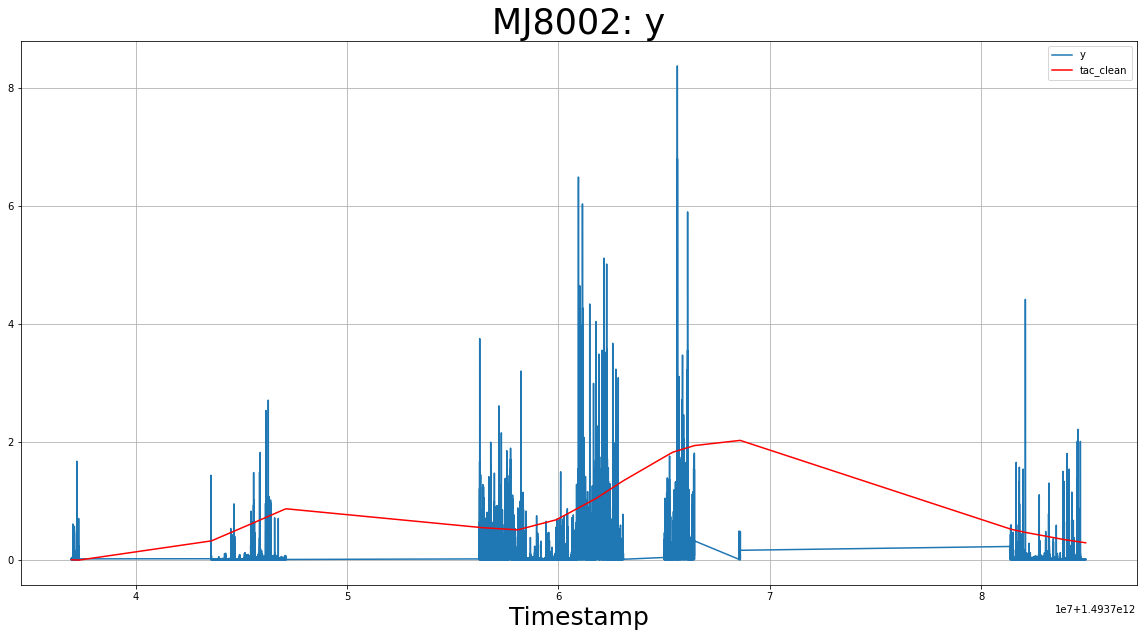

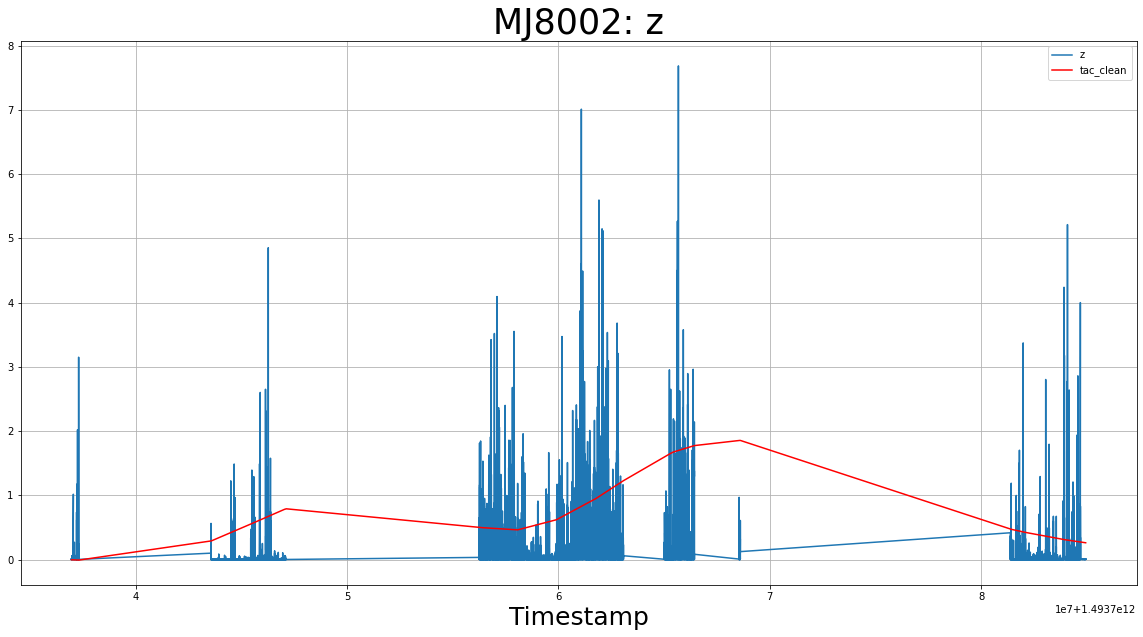

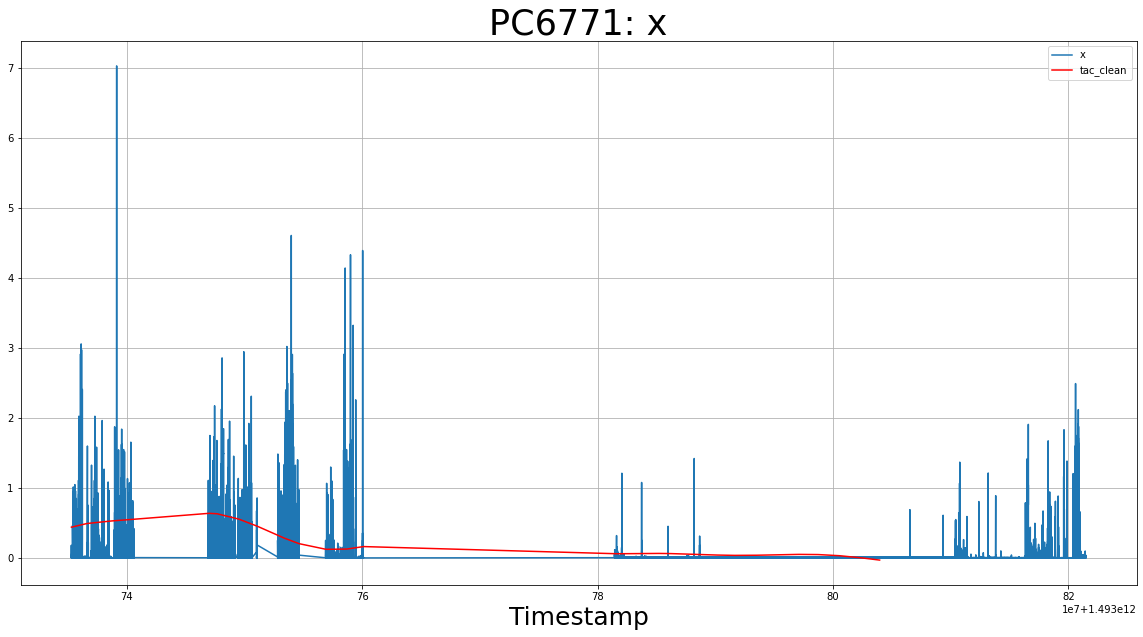

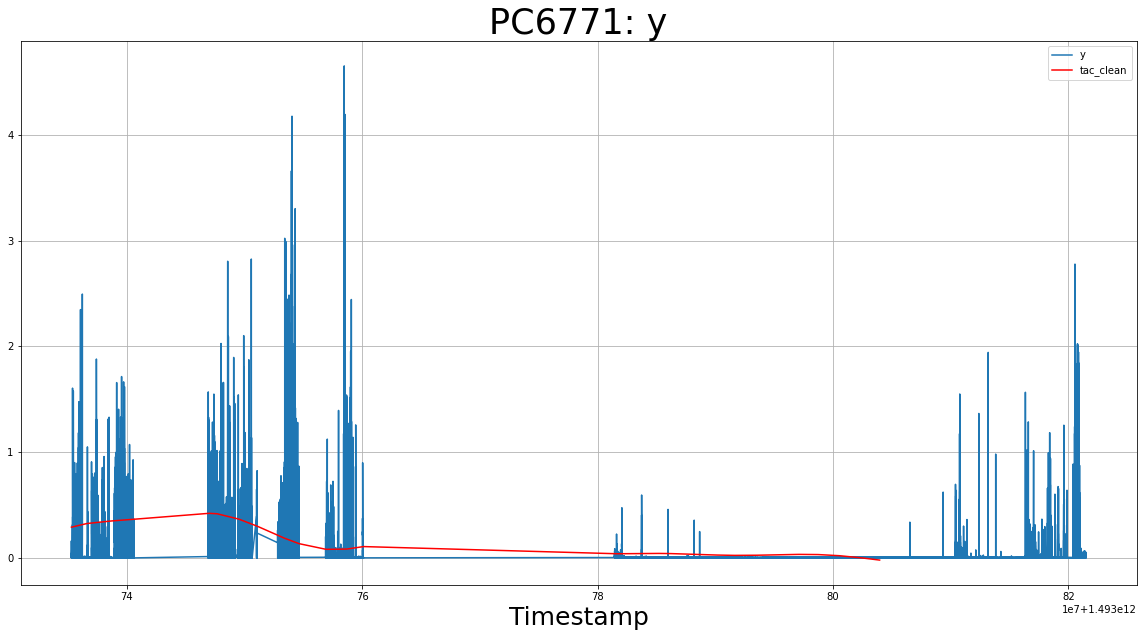

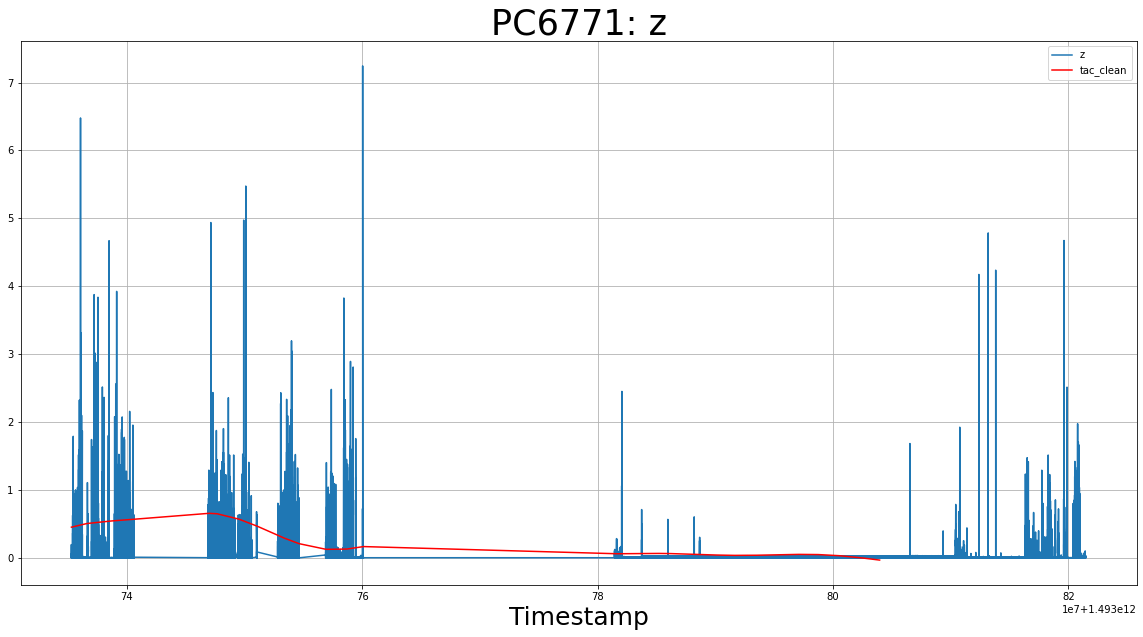

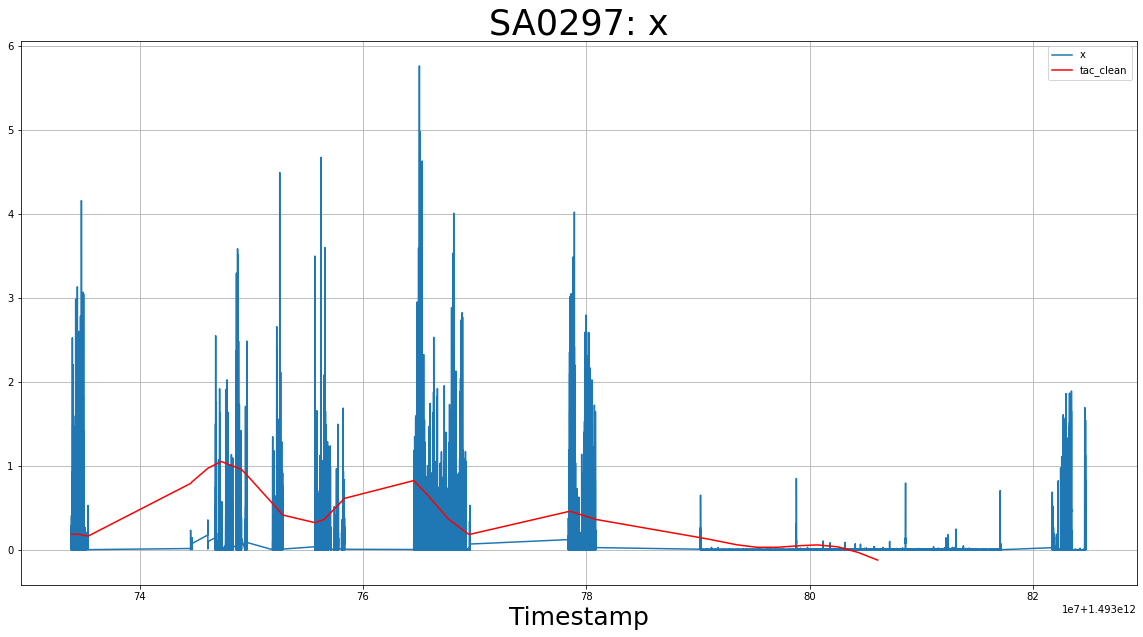

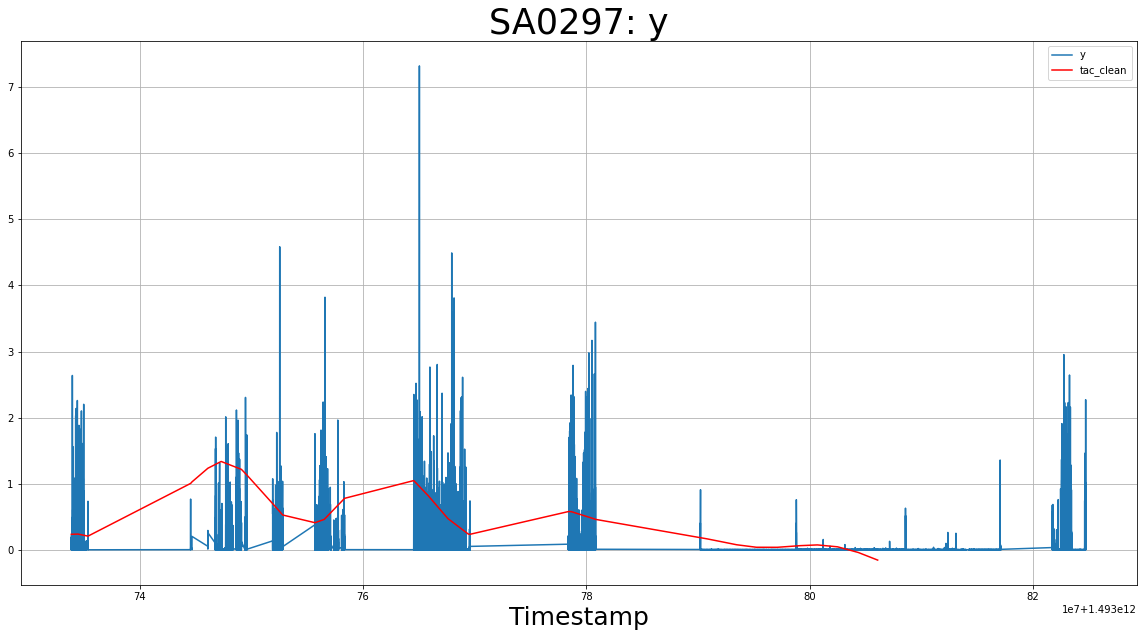

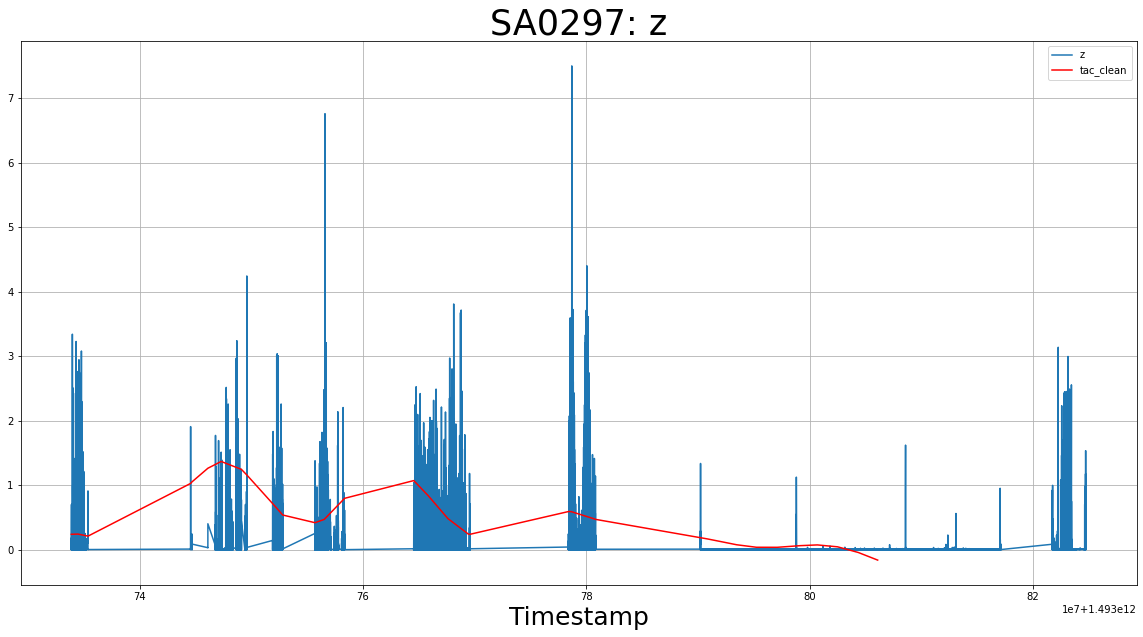

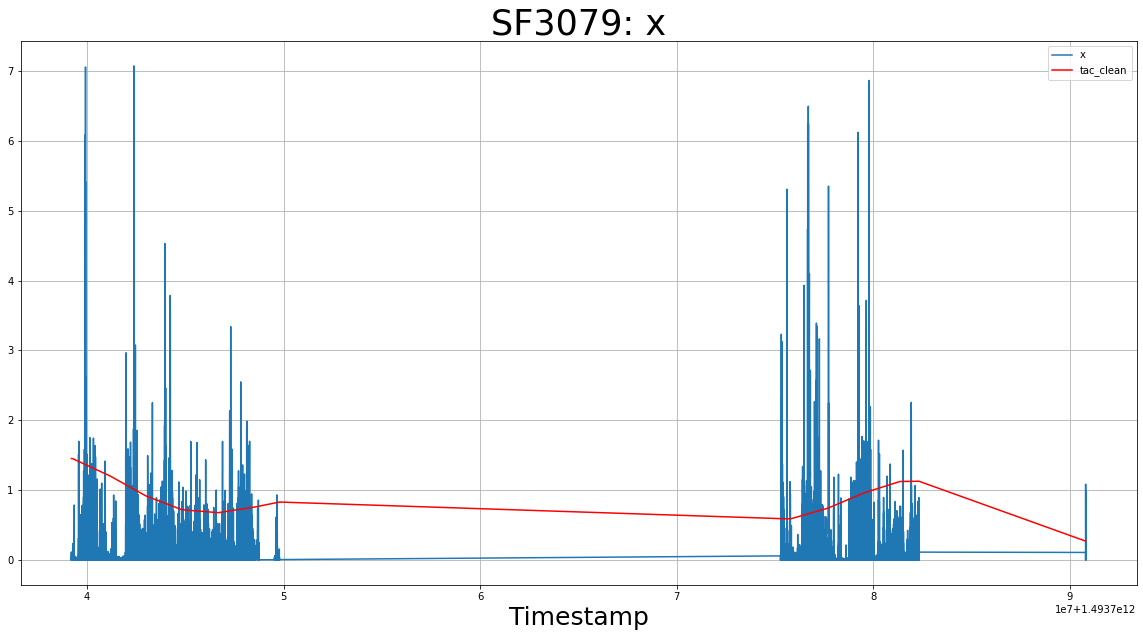

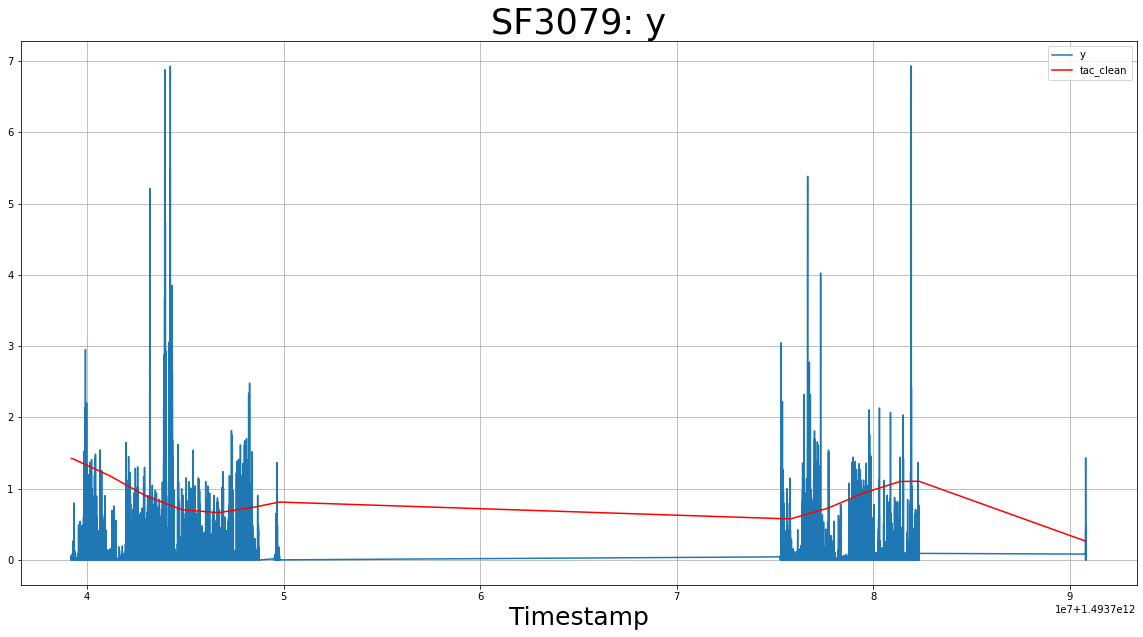

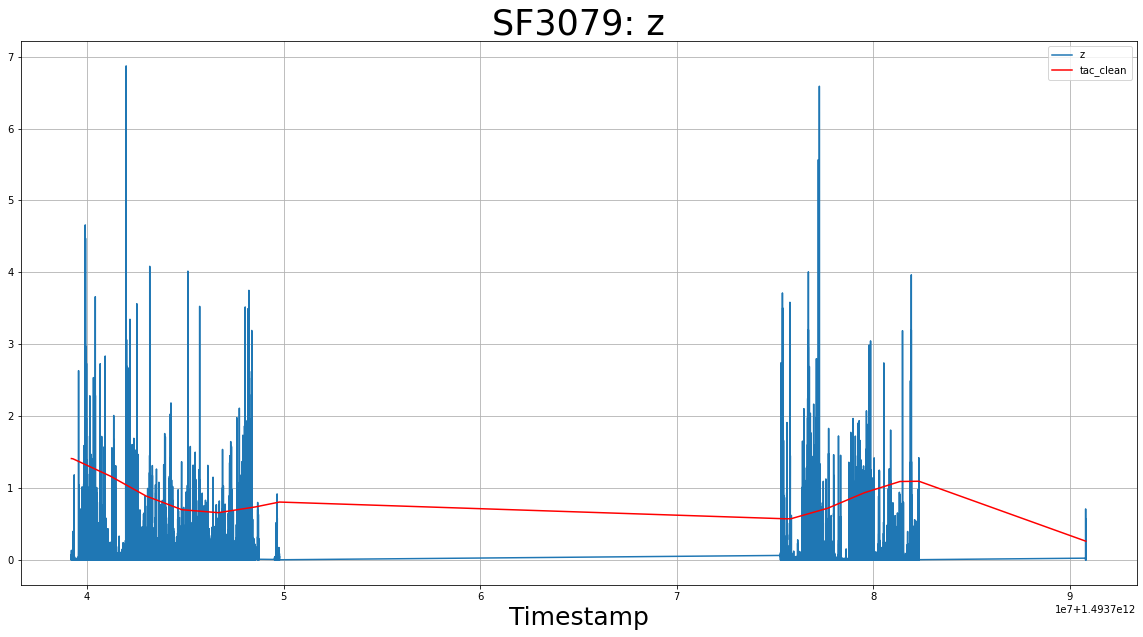

In [8]:
for pid in pids:    
    for coordinate in ['x', 'y', 'z']:
        temp = dfs[pid].copy()
        
        max_ = temp[coordinate].abs().max()
        
        temp['tac_clean'] = max_ * temp['tac_clean']
        temp[coordinate] = temp[coordinate].abs()
             
        first = temp[coordinate].first_valid_index()
        last = temp[coordinate].last_valid_index()
        
        ax = temp.plot.line(x='timestamp', y=coordinate, figsize=(20, 10))
        
        temp.plot.line(x='timestamp', y='tac_clean', figsize=(20, 10), color="red", grid=True, ax=ax)

        plt.title(pid + ": " + coordinate, fontsize=35)
        plt.xlabel("Timestamp", fontsize=25)
        plt.plot()
        plt.show()

# Combining all Axes + Absolute Values (TAC is not real, but emphasized)

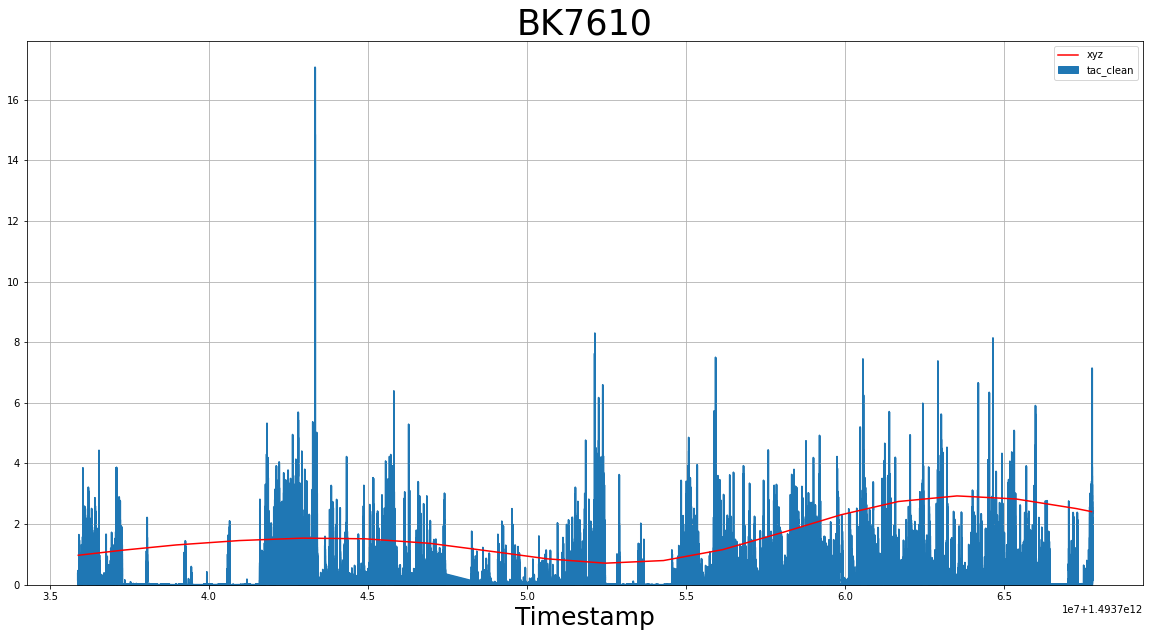

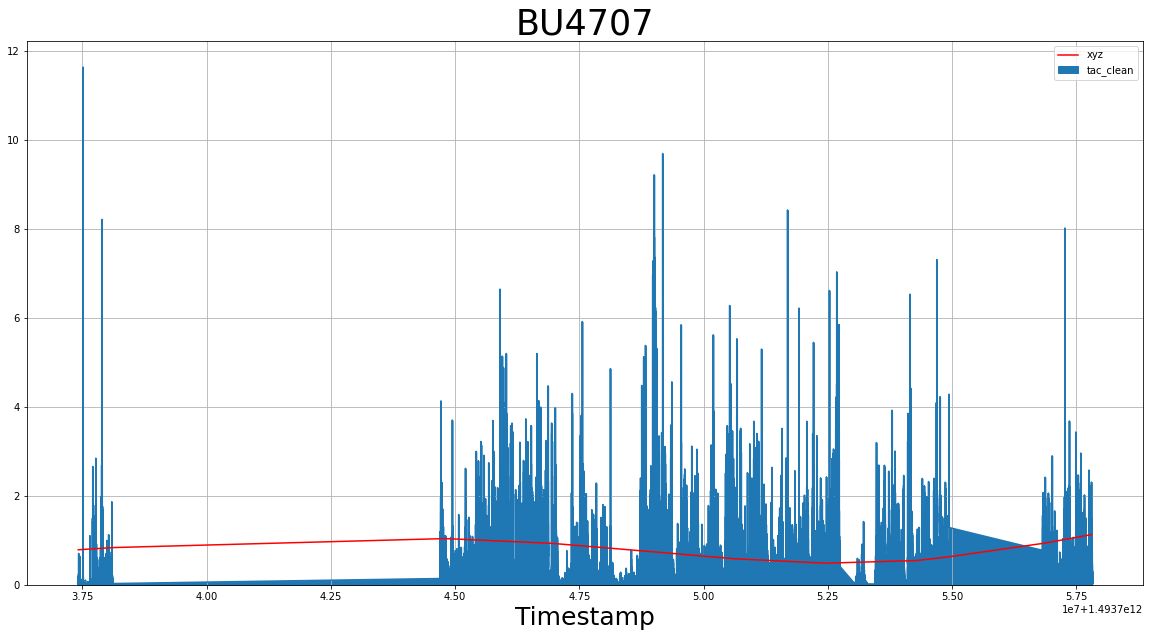

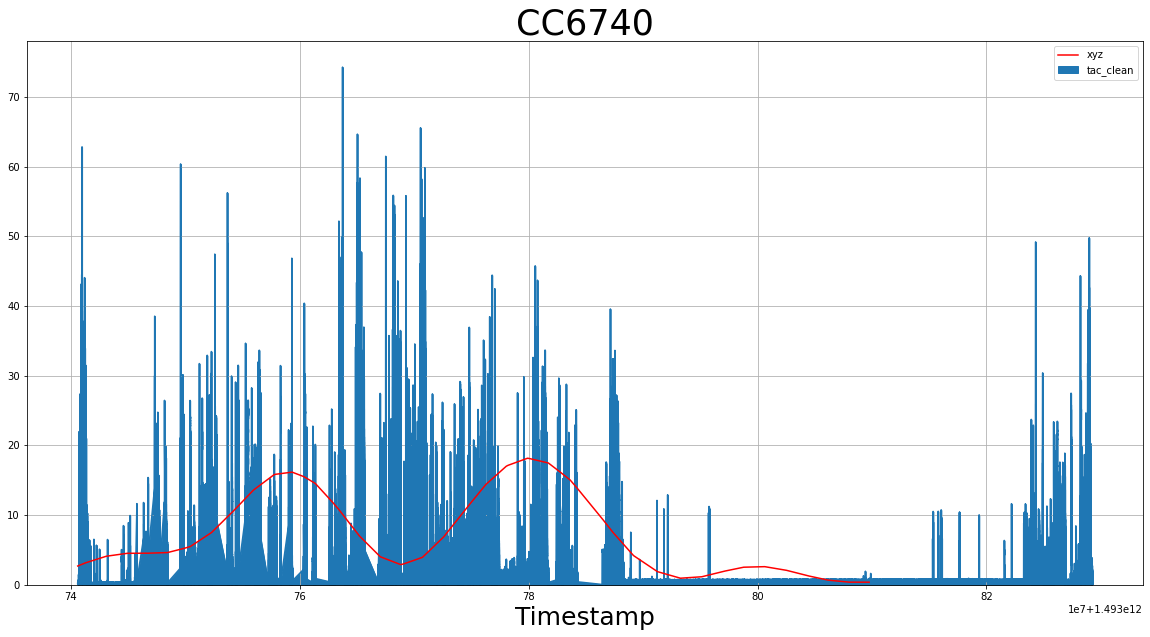

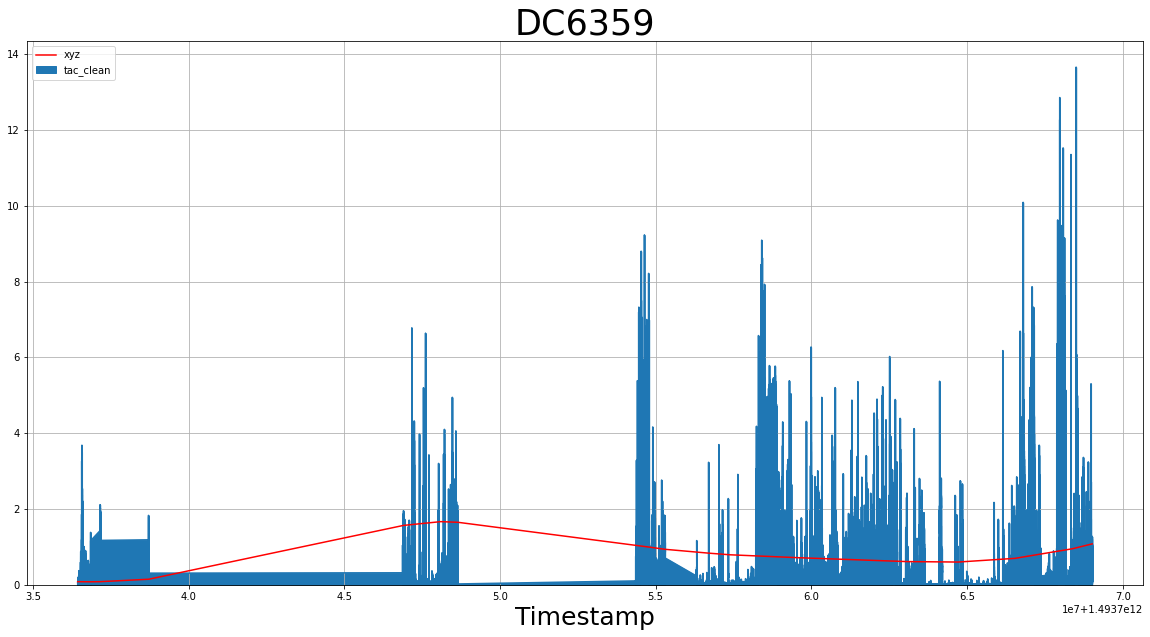

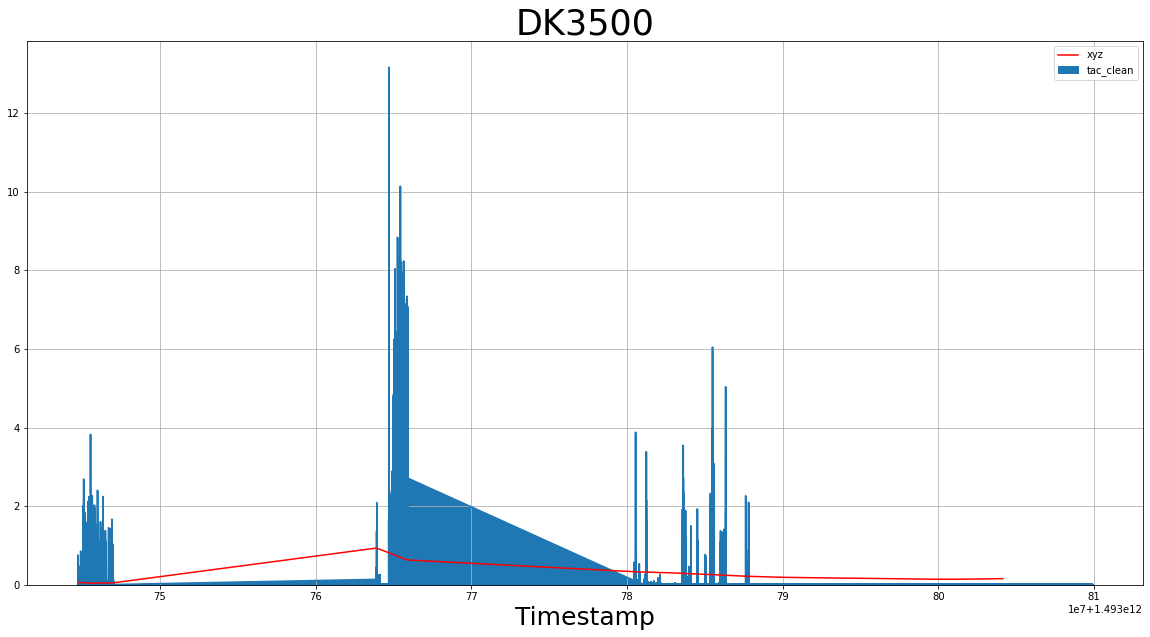

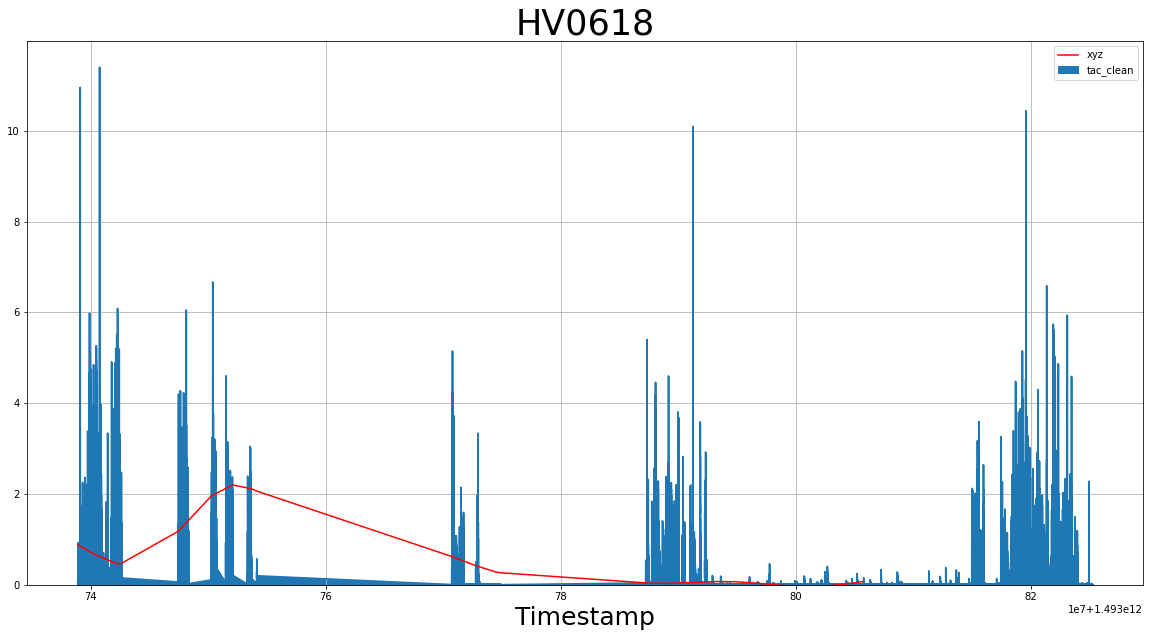

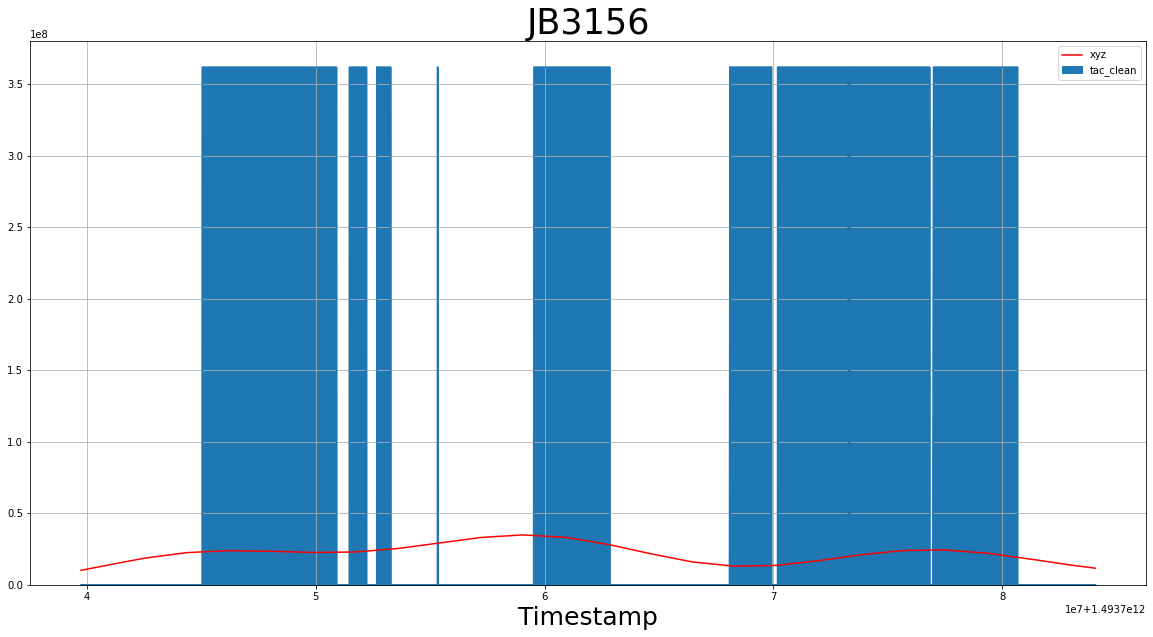

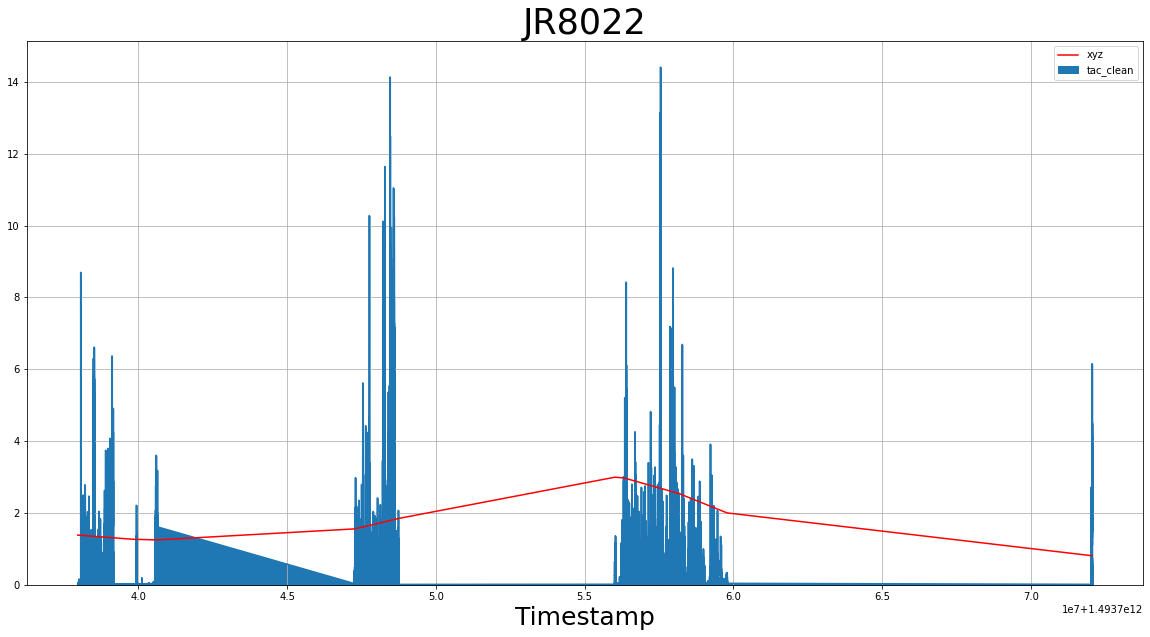

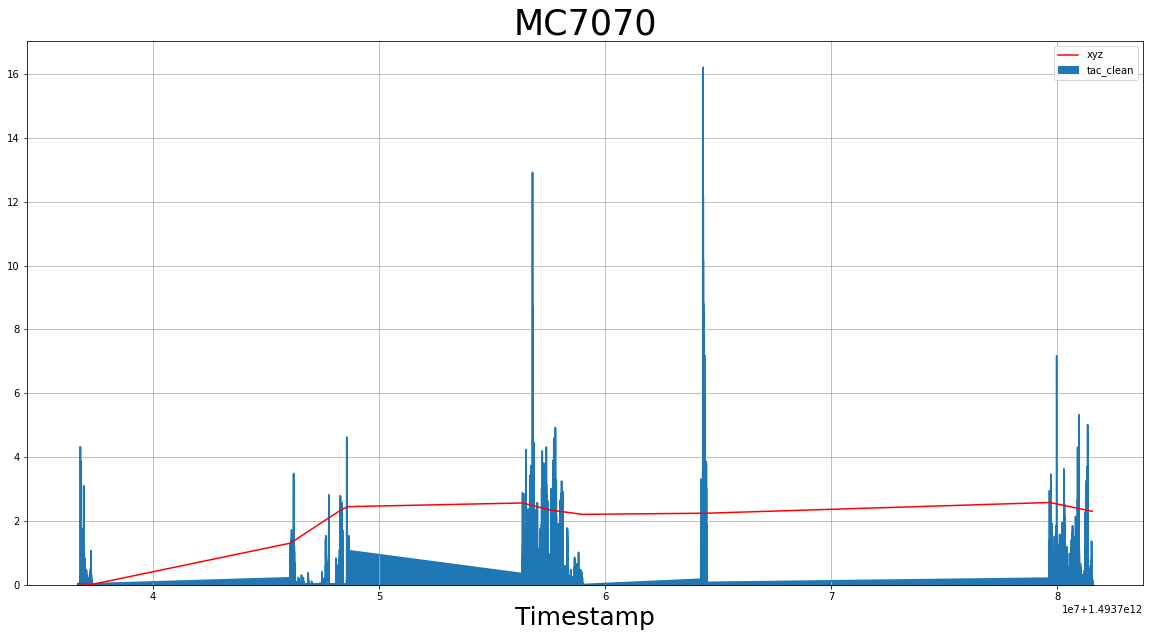

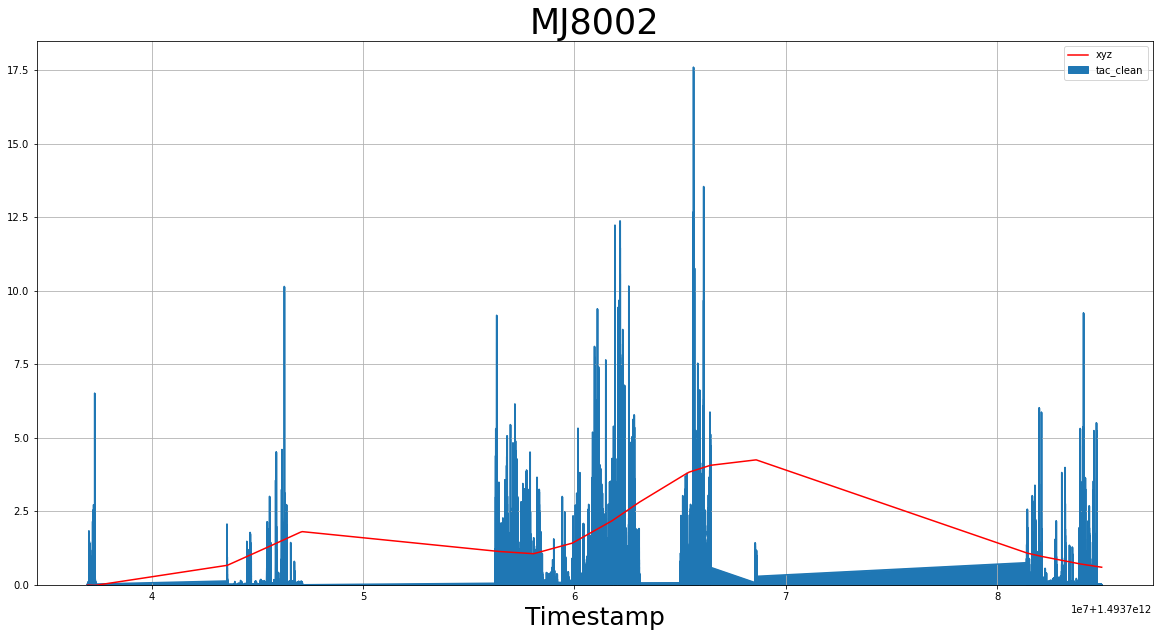

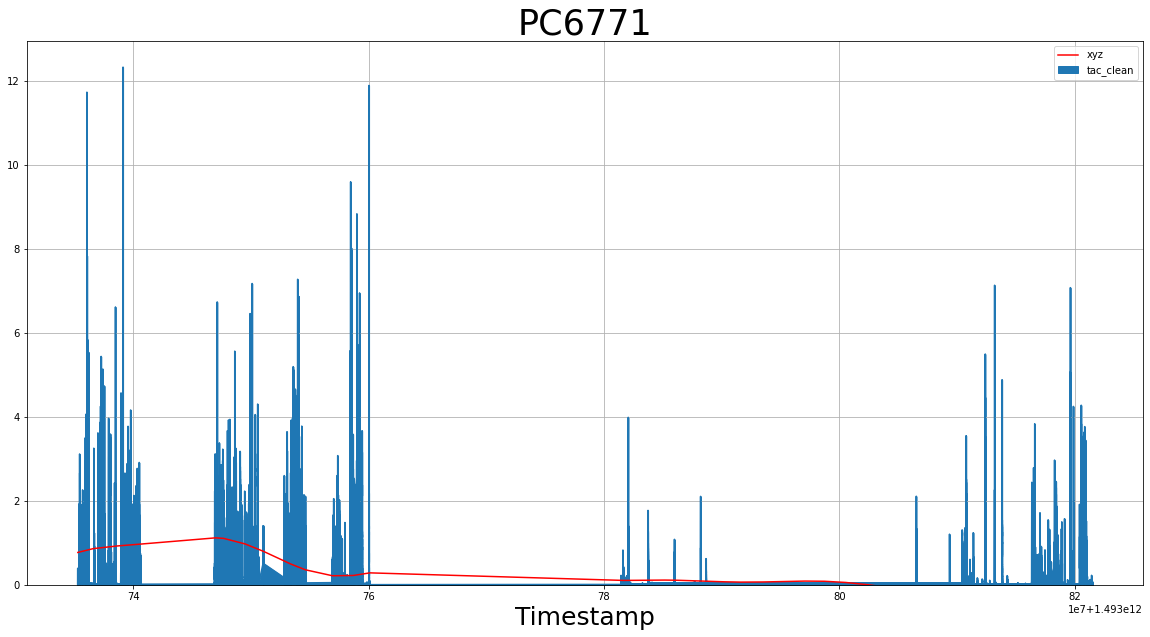

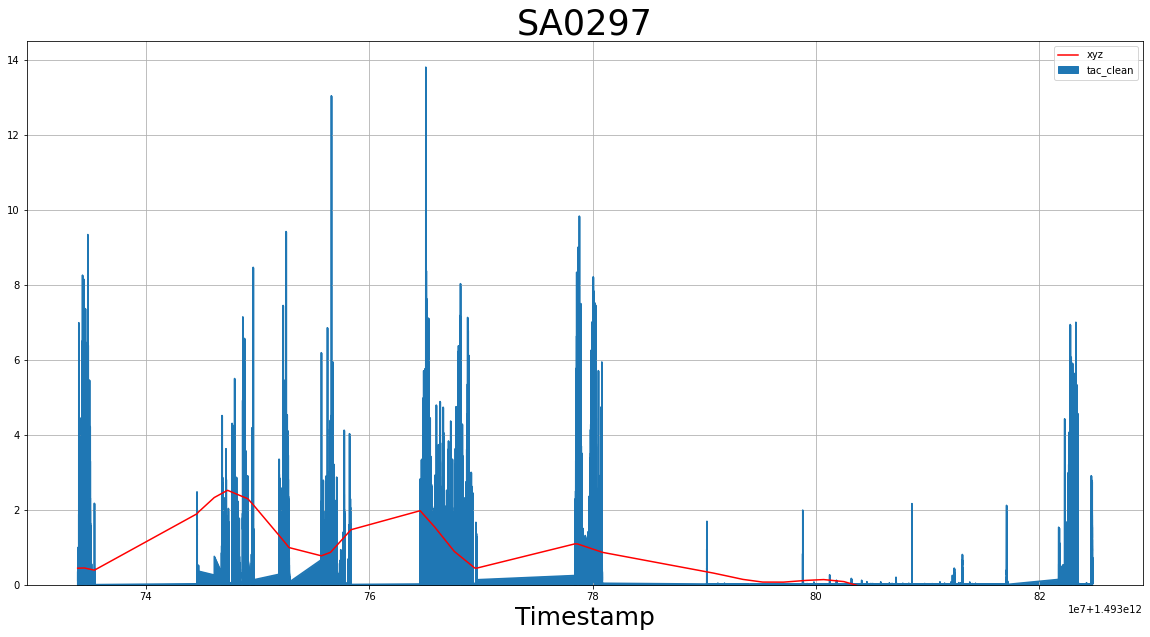

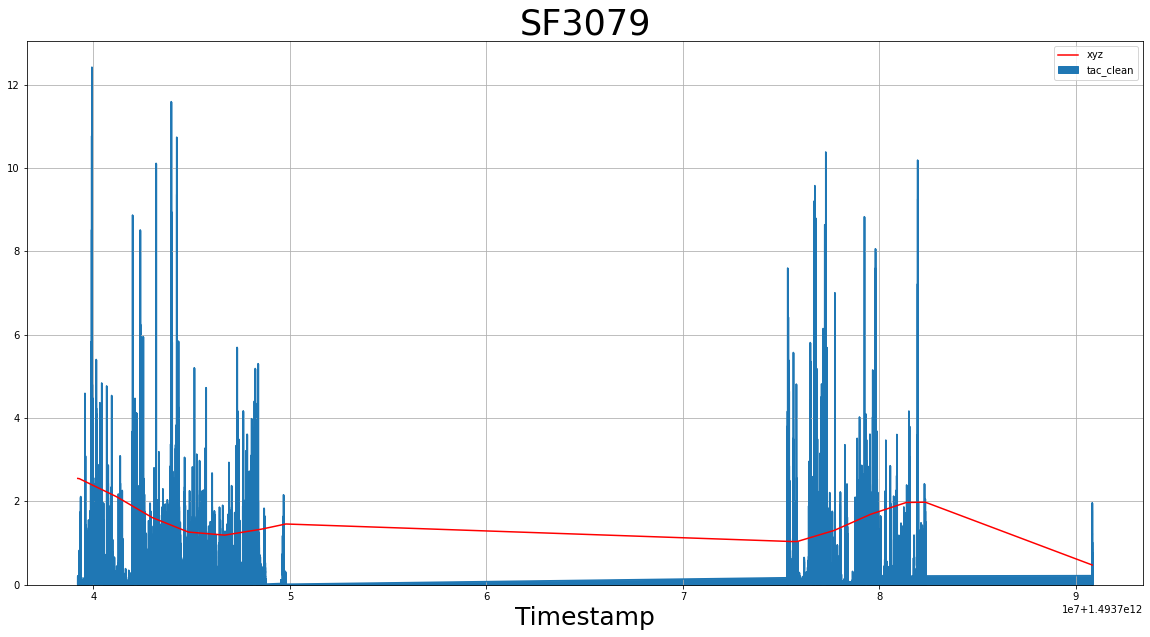

In [9]:
for pid in pids:
    temp = dfs[pid].copy()
    
    
    for coordinate in ['x', 'y', 'z']:
        temp['xyz'] = temp['x'].abs() + temp['y'].abs() + temp['z'].abs()
        
    max_ = temp['xyz'].abs().max()
        
    temp['tac_clean'] = max_ * temp['tac_clean']
        
        
    first = temp['xyz'].first_valid_index()
    last = temp['xyz'].last_valid_index()

    ax = temp.iloc[first:last].plot.area(x='timestamp', y='xyz', figsize=(20, 10))
    temp.iloc[first:last].plot.line(x='timestamp', y='tac_clean', figsize=(20, 10), color="red", grid=True, ax=ax)

    plt.title(pid, fontsize=35)
    plt.xlabel("Timestamp", fontsize=25)
    plt.plot()
    plt.show()

# Temperature against TAC (again TAC is emphasized)

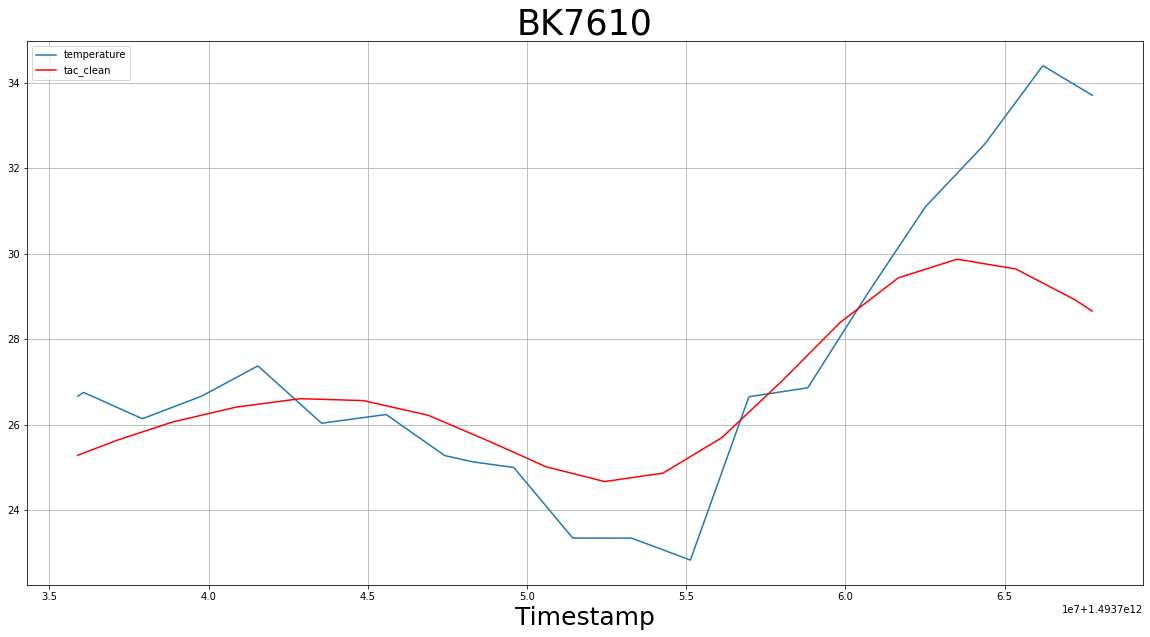

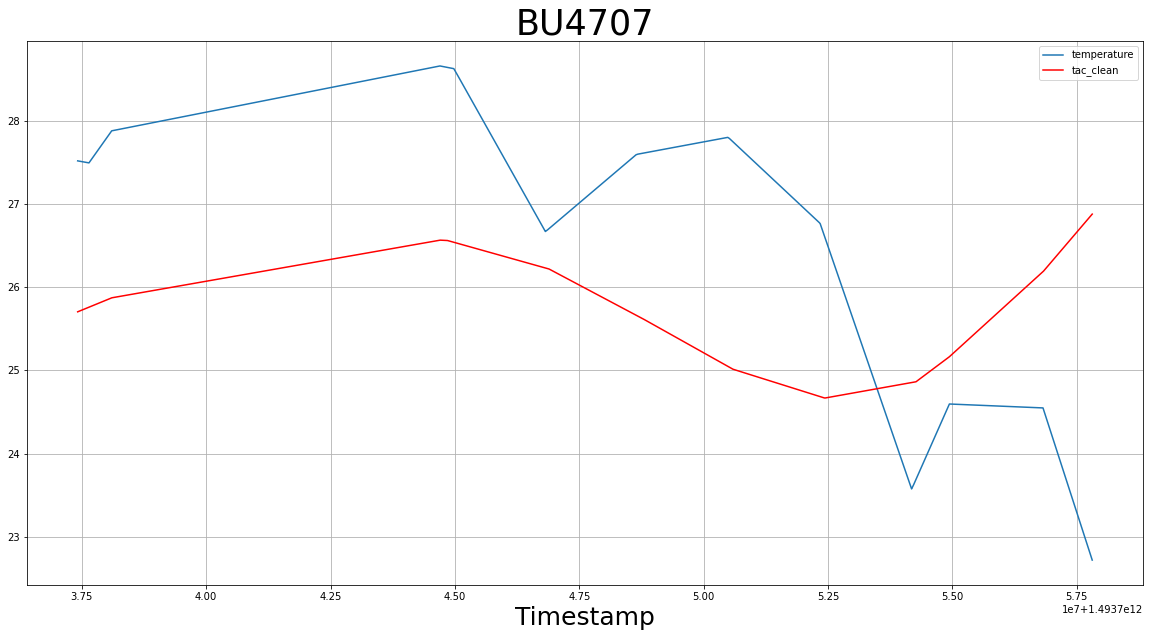

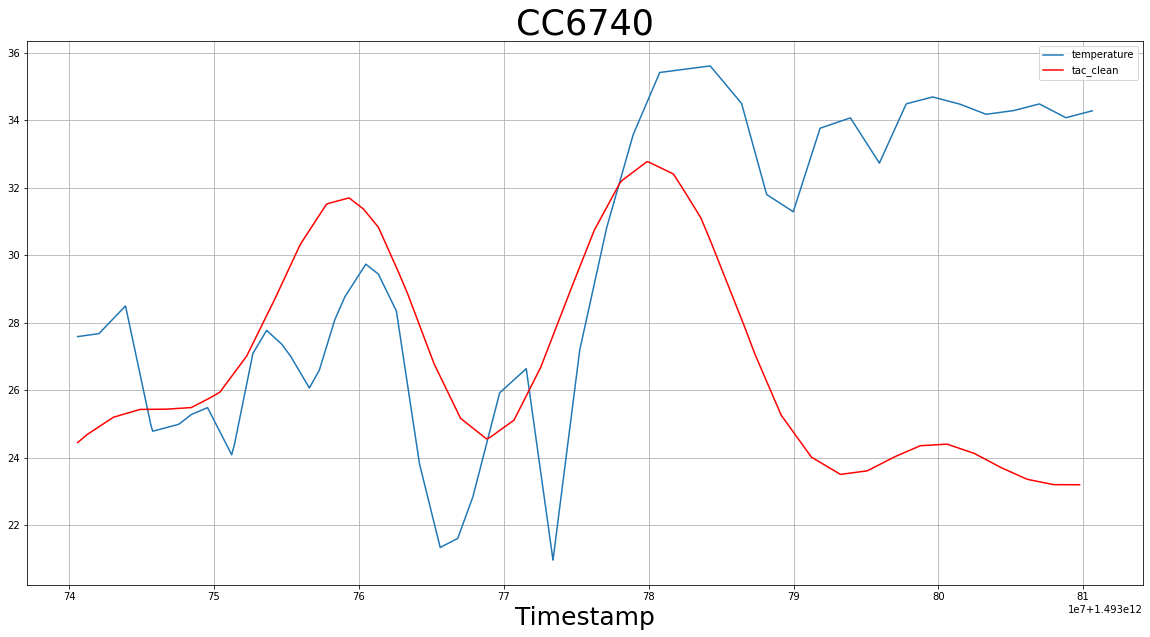

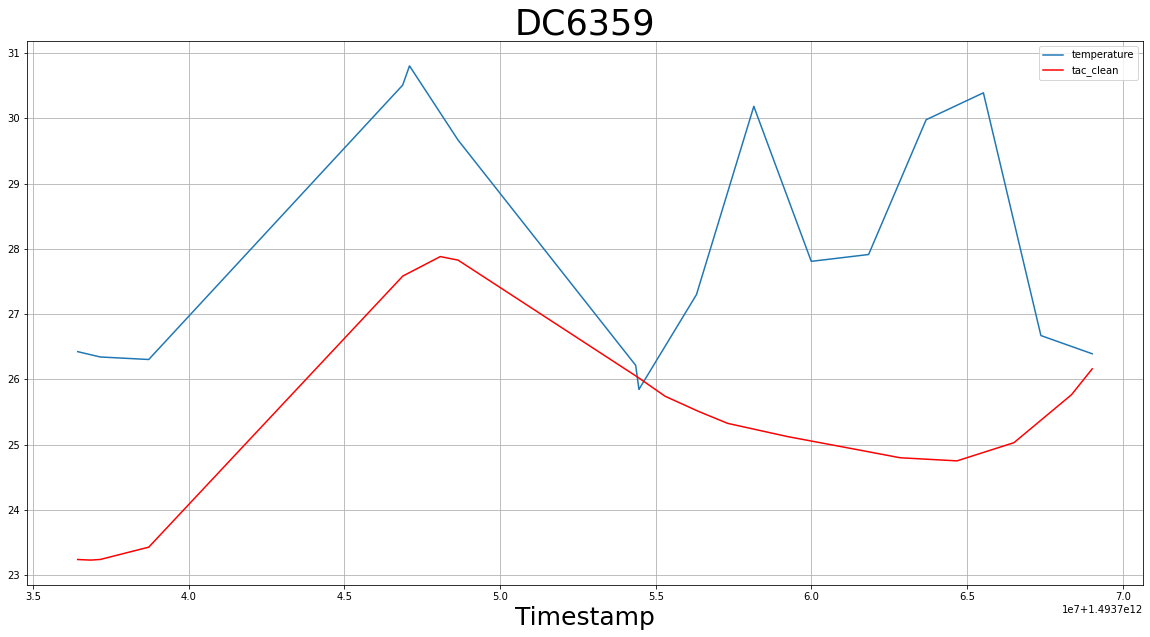

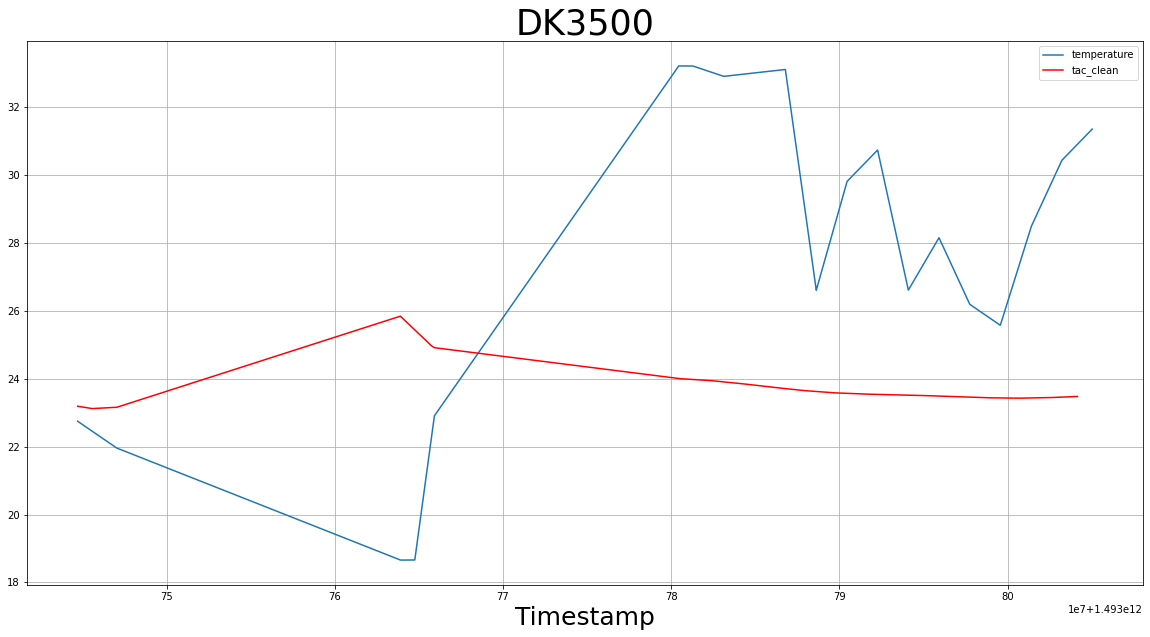

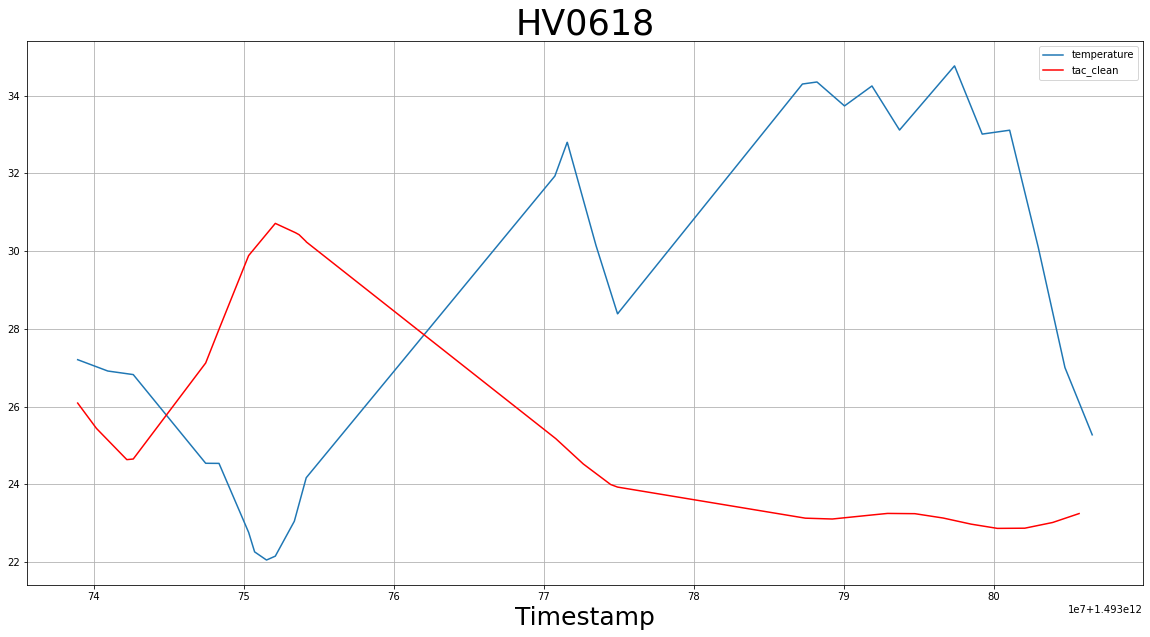

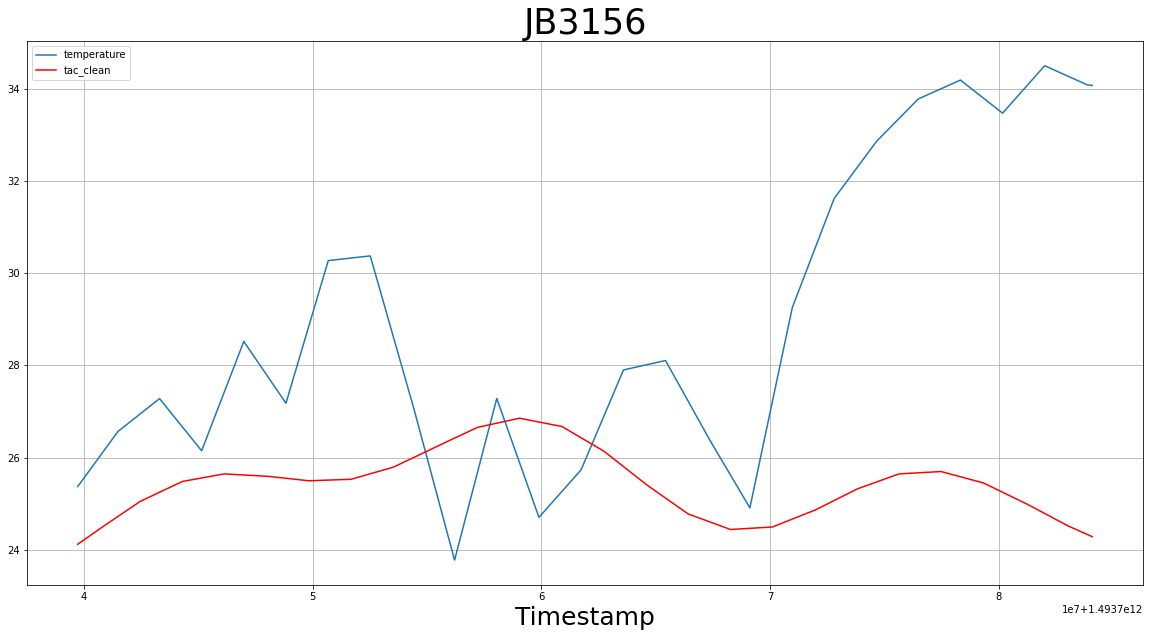

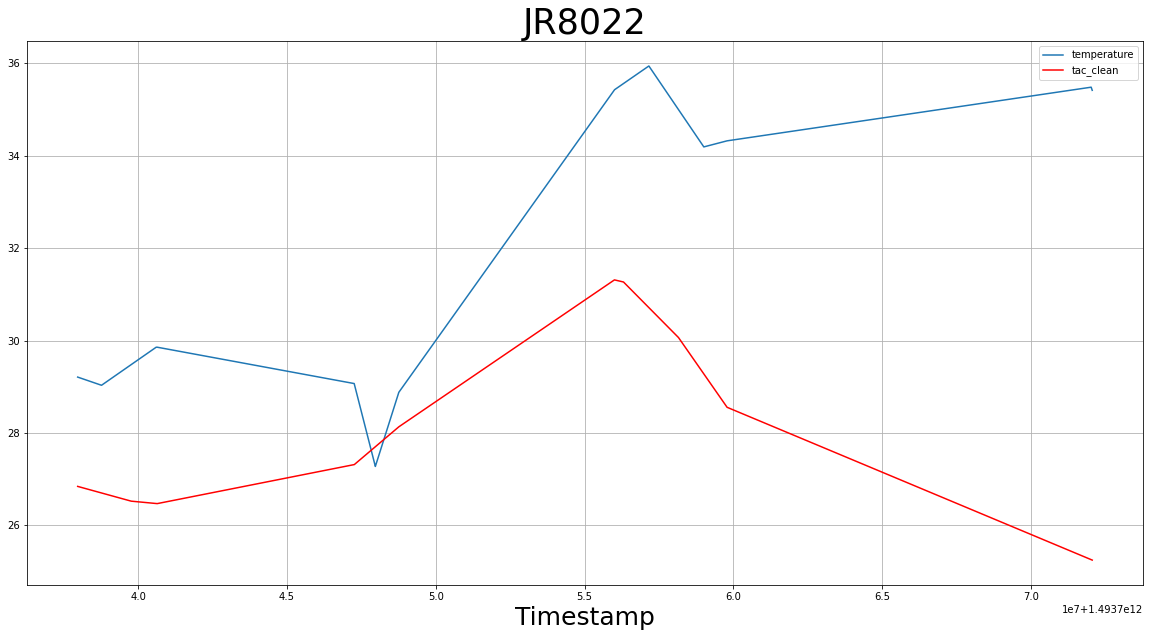

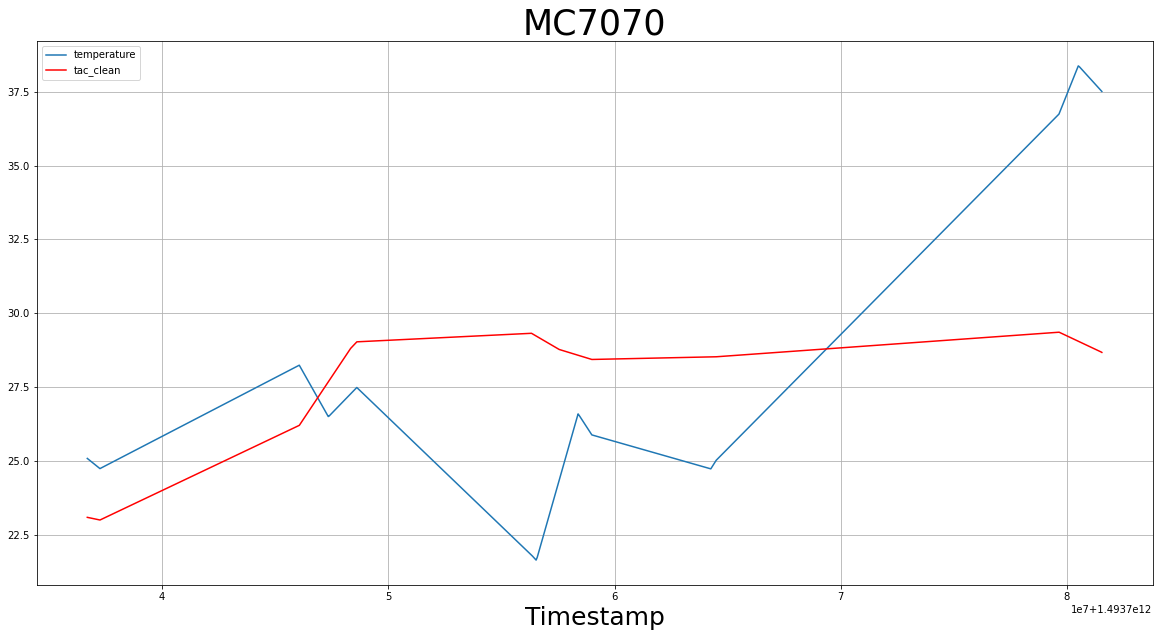

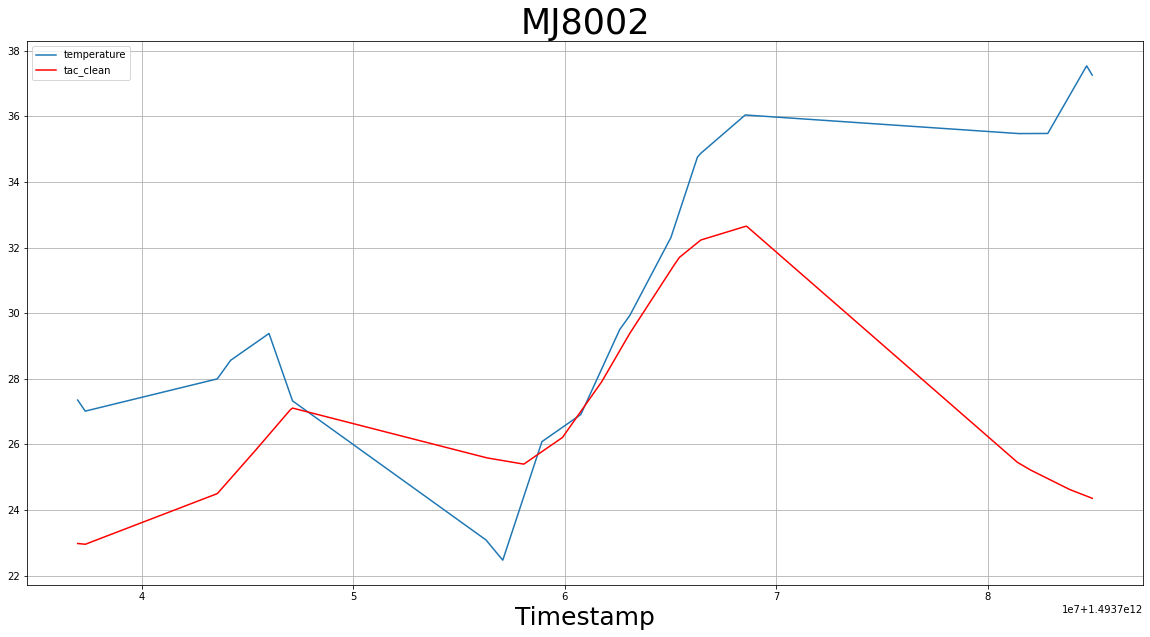

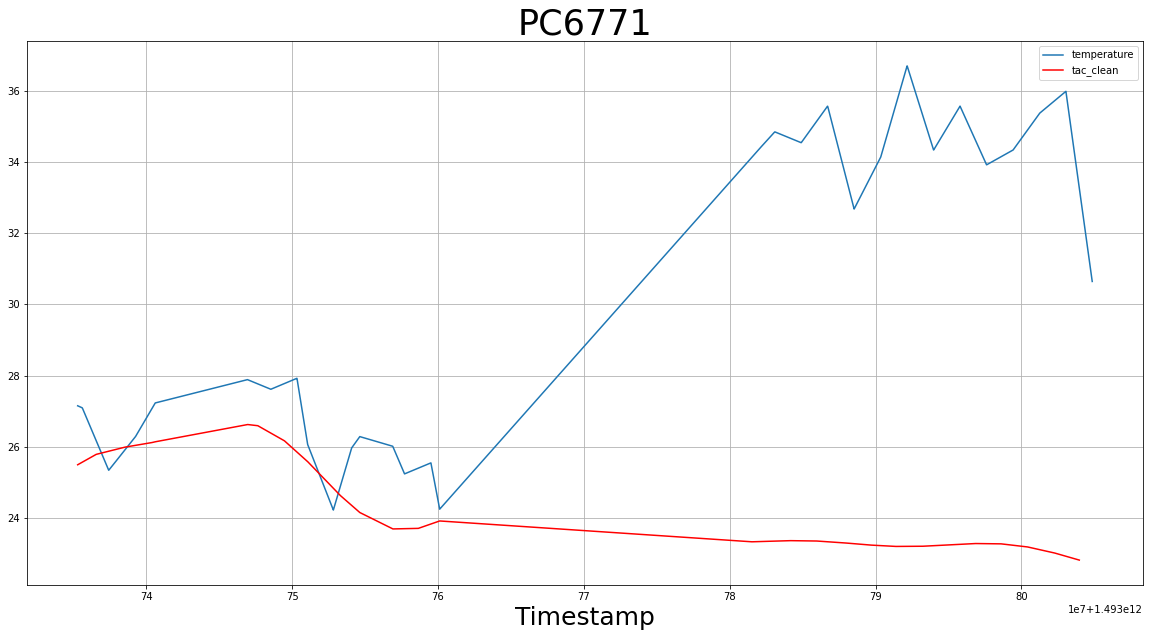

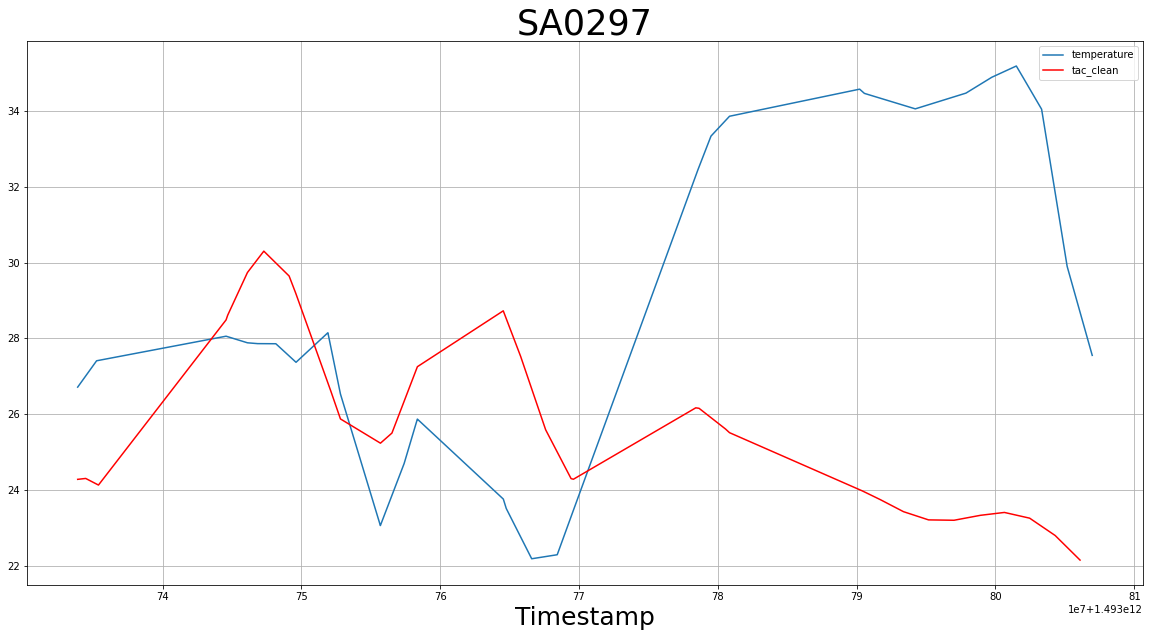

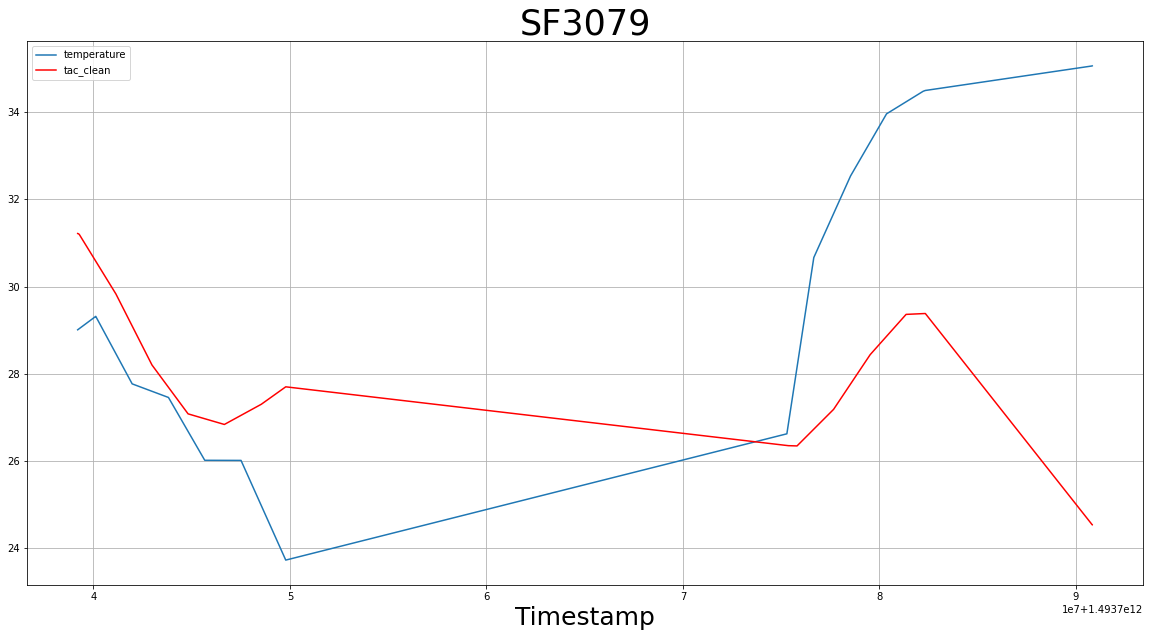

In [10]:
for pid in pids:
    temp = dfs[pid].copy()
    temp['tac_clean'] = temp['tac_clean'] * 40
    temp['tac_clean'] = temp['tac_clean'] + 23
    ax = temp.plot.line(x='timestamp', y='temperature', figsize=(20, 10))
    temp.plot.line(x='timestamp', y='tac_clean', color="red", grid=True, ax=ax)
    plt.title(pid, fontsize=35)
    plt.xlabel("Timestamp", fontsize=25)
    plt.show()

# Correlation matrices

In [11]:
for pid in pids:
    display(dfs[pid].corr())

,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,2.511272e-03,-5.614486e-03,4.488804e-03,0.676127,0.541196,-1.585333e-05,0.588754
x,0.002511,1.000000e+00,1.067741e-01,-3.082823e-02,0.015302,0.030717,-1.439258e-07,0.023514
y,-0.005614,1.067741e-01,1.000000e+00,2.107758e-02,0.002168,-0.012757,2.184515e-07,-0.001232
z,0.004489,-3.082823e-02,2.107758e-02,1.000000e+00,-0.004078,0.013299,8.928698e-07,-0.000628
tac_clean,0.676127,1.530245e-02,2.167823e-03,-4.077936e-03,1.000000,0.734539,-2.057656e-05,0.930050
tac_raw,0.541196,3.071657e-02,-1.275695e-02,1.329892e-02,0.734539,1.000000,-2.102711e-05,0.777372
ir_voltage,-0.000016,-1.439258e-07,2.184515e-07,8.928698e-07,-0.000021,-0.000021,1.000000e+00,-0.000020
temperature,0.588754,2.351447e-02,-1.231950e-03,-6.279037e-04,0.930050,0.777372,-1.957248e-05,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-3.955901e-03,-1.116805e-02,-1.293129e-02,-0.330084,0.101737,-2.067979e-06,-7.437478e-01
x,-0.003956,1.000000e+00,-1.106232e-02,5.740847e-02,0.014755,-0.002297,2.803961e-08,3.105636e-03
y,-0.011168,-1.106232e-02,1.000000e+00,-9.875880e-03,0.007441,-0.003669,7.680269e-08,-1.252006e-03
z,-0.012931,5.740847e-02,-9.875880e-03,1.000000e+00,0.011953,-0.008585,1.338165e-07,1.980058e-03
tac_clean,-0.330084,1.475510e-02,7.441272e-03,1.195327e-02,1.000000,-0.483172,5.797343e-06,8.059437e-02
tac_raw,0.101737,-2.297385e-03,-3.669071e-03,-8.585363e-03,-0.483172,1.000000,-3.585970e-06,4.030025e-01
ir_voltage,-0.000002,2.803961e-08,7.680269e-08,1.338165e-07,0.000006,-0.000004,1.000000e+00,5.342250e-08
temperature,-0.743748,3.105636e-03,-1.252006e-03,1.980058e-03,0.080594,0.403002,5.342250e-08,1.000000e+00


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.010861,-0.023239,0.197637,-0.443486,-0.347301,-0.737390,0.794459
x,-0.010861,1.000000,-0.051940,-0.150996,-0.004045,-0.009941,0.017535,-0.017501
y,-0.023239,-0.051940,1.000000,0.030965,0.048589,0.025652,0.014527,-0.032902
z,0.197637,-0.150996,0.030965,1.000000,-0.154146,-0.108026,-0.158024,0.242347
tac_clean,-0.443486,-0.004045,0.048589,-0.154146,1.000000,0.824764,0.253851,-0.304853
tac_raw,-0.347301,-0.009941,0.025652,-0.108026,0.824764,1.000000,0.199113,-0.277932
ir_voltage,-0.737390,0.017535,0.014527,-0.158024,0.253851,0.199113,1.000000,-0.536721
temperature,0.794459,-0.017501,-0.032902,0.242347,-0.304853,-0.277932,-0.536721,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,0.038160,-0.000186,-0.002696,-0.366978,0.012076,-0.485301,-0.117829
x,0.038160,1.000000,0.325659,-0.088196,0.009687,0.022029,-0.085264,-0.074133
y,-0.000186,0.325659,1.000000,-0.187493,0.017154,0.012482,-0.041001,-0.091088
z,-0.002696,-0.088196,-0.187493,1.000000,0.002266,-0.012794,0.017799,0.013692
tac_clean,-0.366978,0.009687,0.017154,0.002266,1.000000,-0.014847,-0.106028,0.216891
tac_raw,0.012076,0.022029,0.012482,-0.012794,-0.014847,1.000000,0.551189,0.668997
ir_voltage,-0.485301,-0.085264,-0.041001,0.017799,-0.106028,0.551189,1.000000,0.484662
temperature,-0.117829,-0.074133,-0.091088,0.013692,0.216891,0.668997,0.484662,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,0.075770,-0.096377,-0.114805,-0.291655,-0.341593,-0.202808,0.489005
x,0.075770,1.000000,-0.515805,-0.389901,-0.149657,-0.204248,-0.100338,0.097950
y,-0.096377,-0.515805,1.000000,0.426659,0.160008,0.226057,0.113787,-0.113592
z,-0.114805,-0.389901,0.426659,1.000000,0.226466,0.315707,0.155741,-0.144803
tac_clean,-0.291655,-0.149657,0.160008,0.226466,1.000000,0.968117,0.353394,-0.285255
tac_raw,-0.341593,-0.204248,0.226057,0.315707,0.968117,1.000000,0.321612,-0.253020
ir_voltage,-0.202808,-0.100338,0.113787,0.155741,0.353394,0.321612,1.000000,-0.601561
temperature,0.489005,0.097950,-0.113592,-0.144803,-0.285255,-0.253020,-0.601561,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.027093,-0.013528,0.017331,-0.758784,-0.842911,-0.106129,0.572792
x,-0.027093,1.000000,0.017306,-0.048430,0.039085,0.040430,-0.004299,-0.031560
y,-0.013528,0.017306,1.000000,0.000185,0.027175,0.023191,0.012220,-0.020540
z,0.017331,-0.048430,0.000185,1.000000,-0.019684,-0.007608,-0.017542,0.008951
tac_clean,-0.758784,0.039085,0.027175,-0.019684,1.000000,0.840388,0.148519,-0.764581
tac_raw,-0.842911,0.040430,0.023191,-0.007608,0.840388,1.000000,-0.166414,-0.602844
ir_voltage,-0.106129,-0.004299,0.012220,-0.017542,0.148519,-0.166414,1.000000,-0.175338
temperature,0.572792,-0.031560,-0.020540,0.008951,-0.764581,-0.602844,-0.175338,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.123035,-0.184910,0.184910,-0.176649,0.221230,-0.510140,0.642720
x,-0.123035,1.000000,0.041364,-0.041364,0.009622,-0.013422,0.168650,-0.079266
y,-0.184910,0.041364,1.000000,-1.000000,-0.071057,-0.011618,0.085106,-0.178755
z,0.184910,-0.041364,-1.000000,1.000000,0.071057,0.011618,-0.085106,0.178755
tac_clean,-0.176649,0.009622,-0.071057,0.071057,1.000000,0.643368,0.603664,-0.276655
tac_raw,0.221230,-0.013422,-0.011618,0.011618,0.643368,1.000000,0.406056,-0.014472
ir_voltage,-0.510140,0.168650,0.085106,-0.085106,0.603664,0.406056,1.000000,-0.359945
temperature,0.642720,-0.079266,-0.178755,0.178755,-0.276655,-0.014472,-0.359945,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.015122,1.275329e-02,5.538118e-03,0.849055,0.746788,-1.874233e-05,0.843564
x,-0.015122,1.000000,2.587528e-02,8.325595e-02,-0.020216,-0.027899,1.358145e-06,-0.019170
y,0.012753,0.025875,1.000000e+00,1.809414e-01,0.009931,-0.007715,1.763414e-07,-0.007920
z,0.005538,0.083256,1.809414e-01,1.000000e+00,0.001114,0.019966,6.606624e-08,0.023142
tac_clean,0.849055,-0.020216,9.930952e-03,1.113695e-03,1.000000,0.887306,-1.270818e-05,0.878882
tac_raw,0.746788,-0.027899,-7.715246e-03,1.996597e-02,0.887306,1.000000,-1.586281e-05,0.968707
ir_voltage,-0.000019,0.000001,1.763414e-07,6.606624e-08,-0.000013,-0.000016,1.000000e+00,-0.000018
temperature,0.843564,-0.019170,-7.919548e-03,2.314153e-02,0.878882,0.968707,-1.789024e-05,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.003706,-0.002192,-0.013304,0.640096,0.766594,0.077134,0.802419
x,-0.003706,1.000000,0.004227,0.002120,0.000818,0.007405,-0.010012,-0.011962
y,-0.002192,0.004227,1.000000,-0.102919,-0.001330,0.001737,0.002986,-0.007319
z,-0.013304,0.002120,-0.102919,1.000000,-0.007184,-0.013928,-0.027062,-0.003915
tac_clean,0.640096,0.000818,-0.001330,-0.007184,1.000000,0.726240,0.065941,0.261135
tac_raw,0.766594,0.007405,0.001737,-0.013928,0.726240,1.000000,0.130034,0.290505
ir_voltage,0.077134,-0.010012,0.002986,-0.027062,0.065941,0.130034,1.000000,-0.154140
temperature,0.802419,-0.011962,-0.007319,-0.003915,0.261135,0.290505,-0.154140,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.000526,-0.001219,-0.000071,-0.016464,0.319371,-0.037027,0.730091
x,-0.000526,1.000000,-0.115178,0.007025,-0.003395,-0.014642,-0.007817,-0.002648
y,-0.001219,-0.115178,1.000000,-0.026153,0.025073,0.015940,-0.017506,-0.006771
z,-0.000071,0.007025,-0.026153,1.000000,-0.001746,-0.005260,0.001140,0.000420
tac_clean,-0.016464,-0.003395,0.025073,-0.001746,1.000000,0.538285,-0.664987,0.096490
tac_raw,0.319371,-0.014642,0.015940,-0.005260,0.538285,1.000000,-0.247607,0.061054
ir_voltage,-0.037027,-0.007817,-0.017506,0.001140,-0.664987,-0.247607,1.000000,-0.003399
temperature,0.730091,-0.002648,-0.006771,0.000420,0.096490,0.061054,-0.003399,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.024666,-0.018021,0.015874,-0.902598,-0.667974,-0.642737,0.910681
x,-0.024666,1.000000,0.040420,-0.104323,0.029598,0.028199,0.015175,-0.016221
y,-0.018021,0.040420,1.000000,-0.040582,0.027695,0.026880,0.023902,-0.037570
z,0.015874,-0.104323,-0.040582,1.000000,-0.007737,-0.013762,-0.006086,0.010551
tac_clean,-0.902598,0.029598,0.027695,-0.007737,1.000000,0.804181,0.524339,-0.769525
tac_raw,-0.667974,0.028199,0.026880,-0.013762,0.804181,1.000000,0.405990,-0.584948
ir_voltage,-0.642737,0.015175,0.023902,-0.006086,0.524339,0.405990,1.000000,-0.615528
temperature,0.910681,-0.016221,-0.037570,0.010551,-0.769525,-0.584948,-0.615528,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,0.004061,-0.024662,0.040598,-0.772654,-0.585309,-0.417677,0.708858
x,0.004061,1.000000,0.002433,-0.057700,-0.008186,0.000201,-0.010171,0.001380
y,-0.024662,0.002433,1.000000,-0.024367,-0.007047,-0.021891,0.007305,-0.042039
z,0.040598,-0.057700,-0.024367,1.000000,-0.011219,-0.004815,-0.004230,0.022311
tac_clean,-0.772654,-0.008186,-0.007047,-0.011219,1.000000,0.723798,0.666919,-0.587645
tac_raw,-0.585309,0.000201,-0.021891,-0.004815,0.723798,1.000000,0.289139,-0.466506
ir_voltage,-0.417677,-0.010171,0.007305,-0.004230,0.666919,0.289139,1.000000,-0.140552
temperature,0.708858,0.001380,-0.042039,0.022311,-0.587645,-0.466506,-0.140552,1.000000


,timestamp,x,y,z,tac_clean,tac_raw,ir_voltage,temperature
timestamp,1.000000,-0.003807,-0.027578,0.001396,-0.174075,-0.415814,-0.303288,0.811839
x,-0.003807,1.000000,-0.031470,0.022418,0.003799,0.003424,0.005729,-0.002650
y,-0.027578,-0.031470,1.000000,0.096022,-0.013160,-0.006675,-0.003530,-0.029099
z,0.001396,0.022418,0.096022,1.000000,0.011837,0.002431,-0.000240,0.007569
tac_clean,-0.174075,0.003799,-0.013160,0.011837,1.000000,0.588658,0.738375,0.367166
tac_raw,-0.415814,0.003424,-0.006675,0.002431,0.588658,1.000000,0.325916,-0.013925
ir_voltage,-0.303288,0.005729,-0.003530,-0.000240,0.738375,0.325916,1.000000,0.050338
temperature,0.811839,-0.002650,-0.029099,0.007569,0.367166,-0.013925,0.050338,1.000000
